 <font size="6">Нейронные сети</font>

Данный ноутбук основан на материалах из курса по нейронным сетям ([ссылка](https://msu.ai/)) и содержит базовые понятия, связанные с нейронными сетями. 

Раздел 1 посвящен ознакомлению с многослойными нейронными сетями, принципам обучения нейронных сетей, а также концепциям, используемым в библиотеке PyTorch. Раздел 2 посвящен практическому применению многослойных сетей на примере задачи распознавания рукописных цифр. Разделы 3 и 4 посвящены сверточным нейронным сетям, а раздел 5 визуализации карт признаков в сверточных нейронных сетях.

Раздел 1 не обязателен для ознакомления, но может быть полезен для изучения материала по нейросетям и для выполнения заданий. Разделы 2-5 необходимо выполнить для сдачи практического задания 3.5 в электронном курсе.

Данный ноутбук можно выполнить с использованием среды выполнения без GPU, но c GPU ноутбук будет обучать нейронные сети быстрее (Меню Среда выполнения->Сменить среду выполнения->Аппаратный ускоритель->GPU)

#  1. Многослойные сети

По мере развития мощности компьютеров, теоретической базы, появления больших датасетов и метода обратного распространения ошибки, появилась возможность строить более сложные сети - многослойные нейронные сети или же в современном понимании просто **нейронные сети**.

Пример **полносвязной (fully connected network)** нейронной сети с двумя скрытыми слоями:

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/nn_fully_connected.png"  width="400">

##  Обучение нейронной сети

Нейронная сеть в процессе **обучения** с учителем (англ. fit) последовательно (в определенном порядке)обрабатывает все объекты из обучающей выборки. Обучающая выборка может быть передана нейронной сети при обучении несколько раз и тогда одна полная экспозиция объектов из обучающей выборки называется **эпохой обучения**.

Обучающую выборку разделяют на две части: непосредственно использующуюся для обучения (анг. train) и тестовую (англ. test), на которой происходит оценка качества обучения. Стратегия разделения на train и test подвыборки может быть произвольной, но при разделении следует заботиться о том чтобы эти подвыборки были "похожи". В ходе обучения ошибка работы модели измеряется на train и test данных для контроля **переобучения** (англ. overfit). В случае возникновения переобучения нейронная сеть начинает терять обобщающую способность, что можно заметить по возникновению роста ошибки на тестовой подвыборке в ходе процесса обучения -- в случае переобучения нейронная сеть просто "зазубривает" примеры из обучающей подвыборки, а не аппроксимирует искомую функциональную зависимость между признаками и целевой переменной.

##  Прямое распространение

Рассмотрим процесс **обучения с учителем** (анг. supervised learning) нейронной сети с прямым распространением сигнала (анг. Feedforward neural network). В ходе такого процесса мы хотим аппроксимировать при помощи нейронной сети функциональную зависимость между некоторым набором входных сигналов (признаков) и соответствующим им набором выходных сигналов (целевой переменной), используя множество эталонных пар входное значение - выходное значение. 

На этапе прямого распространения, нейронной сети на вход подаются сигналы для объектов из тренировочной выборки и при помощи **функции потерь** (анг. loss function) производится количественное сравнение полученных на выходе нейронной сети выходных сигналов с эталонными значениями. Далее, на этапе обратного распространения, данная информация будет использована для постройки параметров сети.

Этап подстройки параметров нейронной сети может следовать после вычисления функции потерь при распространении сигнала от одного примера (online) или же после накоплении информации об отклике сети на пакете из нескольких примеров из обучающей выборки (**batch**).

##  Веса сети

**Нейрон** является базовым элементом строения нейронной сети. У нейрона есть определенное количество "входов", которыми он "подключён" к выходным значениям других нейронов. Нейрон осуществляет суммирование приходящих в него входных значений, причём учитывает значения входов с определенны весовыми коэффициентами (или просто **весами**), которые в определенном смысле характеризуют их значимость. Веса сети являются вещественными числами и могут быть как положительными, так и отрицательными. Именно веса нейрона являются изменяемыми параметрами и они подвергаются подстройке во время обучения нейронной сети.

###  Как вычислить результат работы нейронной сети

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/nn__xor_example.png"  width="600">

Рассмотрим задачу классификации XOR, то есть на вход подадим 1 и 0, и будем ожидать 1 на выходе. Веса сети определим случайным образом:

$I1=1\quad I2=0$

$w_1=0.45\quad  w_2=0.78\quad 
w_3=-0.12\quad  w_4=0.13$


$w_5=1.5\quad  w_6=-2.3$

```python
H1 = I1*W1+I2*W3 = 1*0.45+0*-0.12 = 0.45
H2 = I1*W2+I2*W4 = 1*0.78+0*0.13 = 0.78
```

Для того чтобы значения H1 и H2 не выходили за предельные значения, используется функция активации 

```python
H1_out = sigmoid(H1) = sigmoid(0.45) = 0.61
H2_out = sigmoid(H2) = sigmoid(0.78) = 0.69
```

```python
O1_in = 0.61*1.5+0.69*-2.3=-0.672
O1_out = sigmoid(-0.672)=0.33
```

Ответ нейронной сети O1_out = 0.33, а мы ожидали на выходе 1. О том, как скорректировать веса нужным образом будет рассказано в разделе о методе обратного распространения ошибки.

###  Смещение (bias)

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/why_add_bias_example.png"  width="500">

Рассмотрим простой пример. На вход нейрона подаётся вес, умноженный на входное значение. После применения функции активации, в зависимости от веса, при всевозможных значениях входа мы можем получить следующие графики:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L05/non_bias_problem_plot.png"  width="600">

Но что если мы захотим чтобы при ```x=2``` чтобы сеть выводила ```0```, тогда без веса смещения эту задачу не решить.

Просто изменить крутизну сигмоиды на самом деле не получится - вы хотите иметь возможность сдвинуть всю кривую вправо.

**Смещение** (англ. bias) - это дополнительный коэффициент, прибавляющийся к сумме входов, наличие смещения позволяет сдвинуть функцию активации влево или вправо, что может иметь решающее значение для успешного обучения.

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/add_bias_example.png"  width="500">

Тогда, при разных смещениях мы можем получить сдвинутые функции активации, что способствует лучшему обучению нейронной сети:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L05/after_add_bias_plot.png"  width="600">

##  Метод обратного распространения ошибки

Итак, у нас есть все компоненты для обучения 2-х слойной модели:
- предобработали данные
- умножили их на веса
- применили функцию активации
- снова умножили
- вычислили значение функции потерь
- взяли градиент
- обновили веса .... ?
- оценили точность

А как будем искать градиент?
Можно вручную посчитать производную от функции потерь и весов. Но если модель поменяется, то придется делать это заново.

Для того что бы упростить этот процесс используется формализм под названием "Алгоритм обратного распространения ошибки" или "Backpropagation"


**Метод обратного распространения ошибки (англ. backpropagation)** является эффективным методом вычисления градиента от функционала потерь многослойной нейронной сети. Благодаря данному методу становится практически возможным использование метода градиентного спуска для проведения процедуры обучения. Не смотря на то что первые работы по обучению многослойных перцептронов методом обратного распространения ошибки были опубликованы ещё в 1974 году, значительного развития данная технология получила сравнительно недавно, после появления современных вычислительных ресурсов.

###  Основная идея метода

Метод обратного распространения ошибки явно использует структуру многослойной нейронной сети как сложной функции, применяя цепное правило дифференцирования для вычисления градиента от функции потерь по весам сети. Градиент от функции потерь нейронной сети вычисляется последовательно, при движении по вычислительному графу нейронной сети от её выходов в направлении входов. Именно такой порядок обхода **вычислительного графа** и обуславливает название метода.

### Граф вычислений

Любую нейронную сеть можно представить в виде графа "последовательных действий", где результат вычисляется последовательно, одно действие за другим.

Для простой модели вычислить производную вручную несложно.

Однако по мере добавления слоев модель может оказаться намного сложнее. Например, так выглядит архитектура AlexNet:


<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/alexnet.png"  width="800">

Алгоритм обратного распространения ошибки позволяет находить градиенты для любого графа вычислений, если описываемая им функция дифференцируема.

В его основе лежит правило взятия производной сложной функции (chain rule)

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L05/chain_rule.png"  width="700">

####  Пошаговый разбор метода обратного распространения

Алгоритм, по которому вычисляются веса, можно представить в виде графа.

А общее правило взятия градиентов можно представить следующим образом:

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/rule_for_taking_gradients.png"  width="500">

Рассмотрим следующую функцию:

$$f(x,w)=\frac{1}{1+e^{-(w_0x_0+w_1x_1+w_2)}}$$

Её можно представить в виде простого графа вычислений:

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/graph_of_calculation_gradient.png"  width="700">

На примере данной несложной функции рассмотрим алгоритм обратного распространения ошибки и найдём величину её градиента по параметрам $w$.
Нам потребуется вычислить частные производные $\frac{\partial f}{\partial w_0}$, $\frac{\partial f}{\partial w_1}$, $\frac{\partial f}{dw_2}$, $\frac{\partial f}{\partial x_0}$ и $\frac{\partial f}{\partial x_1}$. 

Пусть "веса" $w$ инициализированы значениями $w_0=2\;w_1=-3,\;w_2=-3,$а "входные признаки" $x$ принимают значения $x_0=-1.0,\;x_1=-2.0$.

Делая прямой проход через граф вычислений для данной функции, получаем её значение для заданных $w$ и $x$ равным $f=0.73$:

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/forward_pass_example.png"  width="800">

Далее, в соответствии с алгоритмом обратного распространения ошибки, рассчитаем частные производные, пройдясь последовательно по графу вычислений, постепенно накапливая искомое значение для градиента функции:

Для начала посчитаем производную функции $\frac{\partial f}{\partial f}$, которая будет равна единице. Движемся дальше по графу вычислений &mdash; следующая вершина содержит функцию $f(x)=\frac{1}{x}$, производная которой равна $\frac{df}{dx}=-\frac{1}{x^2}$



<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/compute_gradient_1_step.png"  width="800">



В следующем узле находится функция $f(x)=1+x$. Производная от константы $+1$ нулю, то есть производная от производная всего выражения в данном узле равняется просто $\frac{df}{dx}=1$:

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/compute_gradient_2_step.png"  width="800">

Третья вершина содержит экспоненту $f(x)=e^x$. Её производная также является экспонентой $\frac{df}{dx}=e^x$:

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/compute_gradient_3_step.png"  width="800">

Следующая вершина, четвертая, содержит умножение на константу $f(x)=ax$. Производная равна $\frac{df}{dx}=a$:

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/compute_gradient_4_step.png"  width="800">

Двигаясь по графу вычислений мы дошли до узла суммирования, который имеет два входа. Относительно каждого из входов локальный градиент в вершине суммирования будет равен $1$. Так как умножение на единицу не изменит значения входного градиента, всем входам узла суммирования мы можем приписать точно такое же значение входного градиента ($0.2$), что мы имели и для самого узла суммирования. Будем действовать аналогично и со всеми остальными узлами суммирования, что встретятся нам в вычислительном графе.


<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/compute_gradient_5_step.png"  width="800">

Двигаясь далее к началу графа вычислений мы подходим к вершинам умножения. Для такой вершины локальный градиент по отношению к какому-либо из входов просто равен значению оставшегося входа, умноженным на входящий градиент. Точно так же мы можем поступить и с оставшейся второй вершиной умножения, которая привязана к $w_1$ и $x_1$:

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/compute_gradient_6_step.png"  width="800">

Так, двигаясь по графу вычислений в обратном направлении от выхода сети к входным признакам, мы последовательно для каждого узла умножаем локальный градиент на входящий градиент, используя цепное правило дифференцирования сложной функции. В описанном примере мы полностью разбили граф вычислений на отдельные элементарные узлы. Разбиение вычислительного графа на элементарные узлы вовсе не обязательно -- мы можем сгруппировать несколько вершин вместе, если они образуют дифференцируемую функцию и рассматривать их совместно.  

Так, в нашем примере, мы можем заметить что вычислительный граф можно свести к двум операциям: получению выражения $w_0x_0+w_1x_1+w_2$ и последующему вычислению от него сигмоидельной функции. Важно отметить, что сигмоида обладает важным свойством: её производная может быть выражена через саму сигмоидалную функцию:

$$\frac{d\sigma{(x)}}{dx}=(1-\sigma{(x)})\sigma{(x)}$$

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/compute_gradient_join_vertices_sigmoid_example.png"  width="800">

В коде, без использования библиотек подсчёт градиентов можно записать как:

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/calculating_gradients_in_code.png"  width="800">

#### Более сложные случаи

#####  Обратное распространение для векторов:

В случае, когда выход сети $z$ не один (многоклассовая классификация, тексты, картинки и тд.), необходимо учитывать значения каждого элемента выходного вектора, для расчёта градиентов.

Матрица Якоби — матрица, составленной из частных производных отображения.

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/backpopagation_with_vectors.png"  width="700">

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/backpropagation_with_vectors_example.png"  width="700">

##### Множественная вершина

Если вход соединен с несколькими вершинами графа или у вершины больше одного выхода.


<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/multiple_vertices_of_graph.png"  width="700">


То в месте ветвления можно создать дополнительную вершину, которая будет соответствовать операции копирования.

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/add_copy_operation_for_vertex.png"  width="700">

Тогда при обратном распространении, градиент можно разделить в соответствии с осуществлённой операцией

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/upstream_gradient.png"  width="700">

Для базовых операций можно выделить следующие шаблоны "разделения" градиента:

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/add_copy_mul_max_gates.png"  width="700">

####  Анимация работы метода обратного распространения ошибки



Таким образом, метод обратного распространения ошибки включает в себя следующие шаги:
* Forward propagation (FP) - прямое распространение сигнала от входа к выходам (без которого не получить вычисленные значения в графе).
* Back propagation (BP) - расчёт величины градиента от выхода ко входам.
* Обновление весов, в зависимости от величины градиента. На анимации буквой $\eta$ обозначен learning rate.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L05/backprop_animation.gif"  width="600">

#### Введение в PyTorch

В данном практическом модуле работа будет осуществляться с испольованием [PyTorch](https://pytorch.org/), поэтому необходимо познакомиться с основными концептами, принципами и функциями PyTorch.

Лучший друг в этом, конечно же, [документация](https://pytorch.org/docs/stable/index.html), однако можно привести основные моменты этой библиотеки/фреймворка:

##### Основная сущность - torch.tensor

Поскольку основная сущность, с которой мы работаем, это вектора и матрицы, то для них нужен очень мощный и функциональный класс - [torch.Tensor](https://pytorch.org/docs/stable/tensors.html#torch.Tensor)

Пустой класс тензора:

In [1]:
import torch
a = torch.Tensor() 

Конструктор класса с заполнением существующими значениями:

In [2]:
a = torch.tensor([1.1, 2.2, 3.2]) 
a.dtype

torch.float32

Явное указание типа данных:

In [3]:
a = torch.tensor([1.1, 2.2, 3.2], dtype=torch.float64)
a.dtype

torch.float64

Создание 2-мерного тензора, заполненного единицами (для нулей zeros)

In [4]:
a = torch.ones(size=(3, 2)) 
a.size()

torch.Size([3, 2])

Создание 2-мерного тензора, заполненного нашим значением


In [5]:
a = torch.full((3, 2), 5.1) 
a

tensor([[5.1000, 5.1000],
        [5.1000, 5.1000],
        [5.1000, 5.1000]])

Транспонирование (изменение порядка осей)

In [6]:
a = a.T 
a

tensor([[5.1000, 5.1000, 5.1000],
        [5.1000, 5.1000, 5.1000]])

В библиотеке доступно огромное количество встроенных математических примитивов

In [7]:
c = torch.atan2(a[0], a[1]) 
c

tensor([0.7854, 0.7854, 0.7854])

Почти всё, что есть в numpy, есть в pytorch, например sum():

In [8]:
c.sum() 

tensor(2.3562)

Добавление и удаление осей 

In [9]:
a = torch.zeros((2, 5, 1, 8))
print("Original tensor size:\n", a.size())

a = a.permute(dims=(2, 0, 3, 1)) # перестановка измерений
print("After permute tensor size:\n", a.size())

a = a.squeeze() # удаление единичных измерений из тензора
print("After squzee tensor size:\n", a.size())

Original tensor size:
 torch.Size([2, 5, 1, 8])
After permute tensor size:
 torch.Size([1, 2, 8, 5])
After squzee tensor size:
 torch.Size([2, 8, 5])


Преобразование torch.tensor в numpy массив

In [10]:
a.numpy() 

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)

PyTorch позволяет тензору быть представлением существующего тензора. Тензор представления использует те же базовые данные, что и его базовый тензор. Поддержка `view` позволяет избежать явного копирования данных, что позволяет нам выполнять быстрое и эффективное изменение формы, нарезку и операции с элементами.

In [11]:
a = torch.rand(2, 8)
print("Original tensor:\n", a)
b = a.view(4, 4) # подобные трансформации лучше не делать со структурированными данными (например, изображениями)
print("Tensor after view tensor:\n", b)
b += 1
print("Add 1 to tensor:\n", b)

Original tensor:
 tensor([[0.9574, 0.3448, 0.5821, 0.4875, 0.4412, 0.6815, 0.2078, 0.9289],
        [0.4546, 0.4489, 0.1933, 0.3530, 0.9314, 0.0606, 0.4563, 0.2049]])
Tensor after view tensor:
 tensor([[0.9574, 0.3448, 0.5821, 0.4875],
        [0.4412, 0.6815, 0.2078, 0.9289],
        [0.4546, 0.4489, 0.1933, 0.3530],
        [0.9314, 0.0606, 0.4563, 0.2049]])
Add 1 to tensor:
 tensor([[1.9574, 1.3448, 1.5821, 1.4875],
        [1.4412, 1.6815, 1.2078, 1.9289],
        [1.4546, 1.4489, 1.1933, 1.3530],
        [1.9314, 1.0606, 1.4563, 1.2049]])


Размещение тензора на GPU

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Cuda available: ", torch.cuda.is_available(), '\n')
a = a.to(device) # tensor to gpu
b = torch.full_like(a, 2).to(device)
c = a * b # compute on gpu (more fast with parallel computing)
c

Cuda available:  True 



tensor([[3.9147, 2.6896, 3.1643, 2.9751, 2.8824, 3.3630, 2.4156, 3.8578],
        [2.9091, 2.8977, 2.3866, 2.7060, 3.8628, 2.1211, 2.9127, 2.4097]],
       device='cuda:0')

##### Автоматическое вычисление градиентов

Torch умеет запоминать последовательность операций с нашими тензорами и вычислять градиент.

In [13]:
x_train = torch.tensor([1., 2., 3., 4.])
y_train = torch.tensor([2., 4., 6., 8.])

W = torch.tensor(1.0, requires_grad=True) 

print (f"W.grad = {W.grad} (before forward pass must be 'None')")

y_pred = W * x_train
criterion = torch.nn.MSELoss()
MSE = criterion(y_pred, y_train)
print(f"MSE = {MSE}")

# backward pass to compute gradient dMSE/dw
MSE.backward()
print (f"W.grad = {W.grad}")

W.grad = None (before forward pass must be 'None')
MSE = 7.5
W.grad = -15.0


Отсоединение тензора от графа вычислений (используйте при копировании тензора)

In [14]:
W.detach() 

tensor(1.)

##### Другие интересные подмодули фреймворка


Torch

* ```torch.nn``` - Модуль для работы с нейронными сетями в стиле ООП
* ```torch.nn.functional``` - То же, что выше, но в функциональном стиле
* ```torch.utils.data``` - Создание датасета, даталоадера
* ```torch.linalg``` - Линейная алгебра
* ```torch.fft``` - Преобразования Фурье
* ```torch.random``` - Рандом


Torchvision - работа с изображениями
* ```torchvision.transforms``` - Трансформации для изображений
* ```torchvision.datasets``` - Учебные датасеты, трансформации
* ```torchvision.models``` - Готовые нейронки для изображений

Torchaudio - работа с аудио.
* Подмодули для аудио

Torchtext - работа с текстом.
* Подмодули для текста

etc.

####  Обратное распространение ошибки в PyTorch


Рассмотрим пример реализации шага обратного прохода на примере вычисления квадрата ошибки для линейной регрессии (для простоты не будем рассматривать смещение):

$$y=w\cdot x, \quad при \;x=[1,2,3,4],\;y=[2,4,6,8],\;w=1$$

В данном примере видно, что предсказанный моделью $\hat{y}=[1,2,3,4]$ не совпадает с истинными значениями $y$, и соответственно квадратичная ошибка для такого примера будет $$MSE=\frac{1}{4}\sum_{i=1}^4E_i^2=\frac{1}{4}\sum_{i=1}^4(\hat{y}_i-y_i)^2=\frac{1+4+9+16}{4}=7.5$$

Градиент весов $w$ вычисляется следующим образом, в соответствии с chain rule:

$$\frac{d MSE}{d w} = \frac{\partial MSE}{\partial E}\cdot \frac{\partial E}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial w}$$

Рассчитаем его с использованием PyTorch:



In [15]:
import torch

x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# Этот параметр мы хотим оптимизировать -> requires_grad=True
W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)
print (f"W.grad = {W.grad} (before forward pass must be 'None')\n")
# прямое распространение, чтобы расчитать MSE
y_pred = W * x_train
E = y_pred - y_train
SE = E ** 2
MSE = SE.mean()
print(f"MSE = {MSE}")

# обратное распространение, чтобы посчитать градиент dMSE/dw
MSE.backward()
print (f"W.grad = {W.grad}")
print (f"E.grad = {E.retain_grad()}")

W.grad = None (before forward pass must be 'None')

MSE = 7.5
W.grad = -15.0
E.grad = None


В данном примере мы произвели следующие расчеты:

$\frac{\partial MSE}{\partial E}=\frac{\sum\partial E^2}{\partial E}=\frac{1}{4}\cdot2\cdot E=\frac{1}{2}*[-1, -2, -3, -4]=[-0.5, -1, -1.5, -2]\quad *-поэлементное\;умножение$

$\frac{\partial E}{\partial \hat{y}}=\frac{\partial (\hat{y}-y)}{\partial \hat{y}}=1$

$\frac{\partial \hat{y}}{\partial w}=\frac{\partial wx}{\partial w}=x=[1, 2, 3, 4]$

$\frac{d MSE}{d w} = \frac{\partial MSE}{\partial E}\cdot \frac{\partial E}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial w}=\sum[-0.5, -1, -1.5, -2]*[1, 2, 3, 4]=-0.5-2-4.5-8=-15$

`MSE.backward()` автоматически вычисляет градиент $\frac{dMSE}{dw}$ при указании `requires_grad=True`. 
Результаты вычислений будут храниться в `W.grad`. Для всех промежуточных переменных градиенты не сохраняются, поэтому попытка обратиться, например, к `E.grad` выдает `None`. 

Также после однократного обратного прохода, в целях экономии памяти, граф, используемый для вычисления градиента, будет удаляться и следующий запуск `MSE.backward()` будет выдавать ошибку:



```
MSE.backward() # Error on second backward call
```



Чтобы сохранить вычислительный граф, для аргумента `retain_graph` функции `backward()` нужно указать значение `True`. Также может быть полезным сохранять значения градиентов для промежуточных переменных, это делается с помощью функции `tensor.retain_grad()`. В таком случае, значения градиентов, полученные на следующих итерациях обратного распространения ошибки, будут складываться с текущими значениями градиентов.

Градиенты переменных, для которых был указан `retain_graph=True` сохраняются автоматически, чтобы избежать их накопления при многократном итерировании алгоритма обратного распространения, нужно обнулять градиент на каждом шаге с помощью функции `tensor.grad.zero_()`

In [16]:
x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# Этот параметр мы хотим оптимизировать -> requires_grad=True
W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)

# прямое распространение, чтобы расчитать MSE
y_pred = W * x_train
E = y_pred - y_train
E.retain_grad() # Сохраняем градиенты во временный тензор E
SE = E**2
MSE = SE.sum().div(4)

print("========== Backprop 1 ==============")
MSE.backward(retain_graph=True)
print (f"dMSE/dE = {E.grad}")
print (f"dMSE/dW = {W.grad}")

print("========== Backprop 2 ==============")
MSE.backward(retain_graph=True)
# Gradients are accumulated
print (f"dMSE/dE = {E.grad}")
print (f"dMSE/dW = {W.grad}")

print("========== Backprop 3 ==============")
W.grad.zero_() # Обнуляем градиенты для W для выполнения следующей итерации
MSE.backward(retain_graph=True)
# Градиенты для W не накапливаются, но для E сохраняются
print (f"dMSE/dE = {E.grad}")
print (f"dMSE/dW = {W.grad}")

========== Backprop 1 ==============
dMSE/dE = tensor([-0.5000, -1.0000, -1.5000, -2.0000])
dMSE/dW = -15.0
========== Backprop 2 ==============
dMSE/dE = tensor([-1., -2., -3., -4.])
dMSE/dW = -30.0
========== Backprop 3 ==============
dMSE/dE = tensor([-1.5000, -3.0000, -4.5000, -6.0000])
dMSE/dW = -15.0


Итак, мы умеем вычислять градиент $\frac{\partial MSE}{\partial w}$ для нашего примера. Теперь давайте с его помощью оптимизируем веса, используя алгоритм обратного распространения ошибки:

In [17]:
x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_tain = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)

# Зададим выход модели
def forward(x_train):
    return W * x_train

# Зададим MSE loss 
def criterion(y_pred, y_train):
    return ((y_pred - y_train)**2).mean()

print(f'Prediction before training: f(x) = {forward(x_train)}')
print(f'True values: y = {y_train}\n')

# Обучение
learning_rate = 0.005
num_epochs = 102

for epoch in range(num_epochs):
    # Прямое распространение
    y_pred = forward(x_train)

    # Вычисляем MSE loss
    MSE = criterion(y_pred, y_train)

    # Обратное распространение, вычисляем градиенты
    MSE.backward()

    # Обновляем веса
    with torch.no_grad(): #  Мы не хатим, чтобы шаг обновления весов был частью вычислительного графа
        W -= learning_rate * W.grad 
    
    # Зануляем градиенты после обновления весов, чтобы их значения не накапливались
    W.grad.zero_()

    if epoch % 10 == 1:
        print(f'epoch {epoch}: w = {W.item():.3f}, loss = {MSE.item():.8f}')

print(f'\nPrediction after training: f(x) = {forward(x_train)}')
print(f'True values: y = {y_train}')

Prediction before training: f(x) = tensor([1., 2., 3., 4.], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])

epoch 1: w = 1.144, loss = 6.41718674
epoch 11: w = 1.608, loss = 1.34952068
epoch 21: w = 1.820, loss = 0.28380114
epoch 31: w = 1.917, loss = 0.05968266
epoch 41: w = 1.962, loss = 0.01255111
epoch 51: w = 1.983, loss = 0.00263946
epoch 61: w = 1.992, loss = 0.00055505
epoch 71: w = 1.996, loss = 0.00011674
epoch 81: w = 1.998, loss = 0.00002455
epoch 91: w = 1.999, loss = 0.00000516
epoch 101: w = 2.000, loss = 0.00000109

Prediction after training: f(x) = tensor([1.9996, 3.9993, 5.9989, 7.9986], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])


Видно, что наш подход позволяет оптимизировать вес $w$ регрессии из примера и таким образом добиться почти идеального предсказания нашей модели, однако в данном подходе дополнительно можно автоматизировать вычисление функции потерь и обновление параметров с учетом градиента, используя готовые функции потерь из `torch.nn` и оптимизаторы из `torch.optim`.

In [18]:
import torch.nn as nn

x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_tain = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)

# Зададим выход модели
def forward(x_train):
    return W*x_train


print(f'Prediction before training: f(x) = {forward(x_train)}')
print(f'True values: y = {y_train}\n')

# Обучение
learning_rate = 0.005
num_epochs = 102

criterion = nn.MSELoss()
optimizer = torch.optim.SGD([W], lr=learning_rate)

for epoch in range(num_epochs):
# Прямое распространение
    y_pred = forward(x_train)

    # Вычисляем MSE loss
    MSE = criterion(y_pred, y_train)

    # Обратное распространение, вычисляем градиенты
    MSE.backward()

    # Обновляем веса
    optimizer.step()

    # Зануляем градиенты после обновления весов, чтобы их значения не накапливались
    optimizer.zero_grad()

    if epoch % 10 == 1:
        print(f'epoch {epoch}: w = {W.item():.3f}, loss = {MSE.item():.8f}')

print(f'\nPrediction after training: f(x) = {forward(x_train)}')
print(f'True values: y = {y_train}')

Prediction before training: f(x) = tensor([1., 2., 3., 4.], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])

epoch 1: w = 1.144, loss = 6.41718674
epoch 11: w = 1.608, loss = 1.34951985
epoch 21: w = 1.820, loss = 0.28380090
epoch 31: w = 1.917, loss = 0.05968266
epoch 41: w = 1.962, loss = 0.01255111
epoch 51: w = 1.983, loss = 0.00263946
epoch 61: w = 1.992, loss = 0.00055505
epoch 71: w = 1.996, loss = 0.00011674
epoch 81: w = 1.998, loss = 0.00002455
epoch 91: w = 1.999, loss = 0.00000516
epoch 101: w = 2.000, loss = 0.00000109

Prediction after training: f(x) = tensor([1.9996, 3.9993, 5.9989, 7.9986], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])


###  Преимущества и недостатки метода

В настоящее время метод обратного распространения ошибки фактически стал стандартом при обучении широкого спектра современных архитектур нейронных сетей. Этот метод даёт итерационное решение задачи поиска минимума функционала ошибки, последовательно подстраивая веса нейронной сети в ходе обучения. К сожалению, такой подход не гарантирует что в ходе обучения нейронной сети мы действительно достигнем абсолютного минимума функции потерь. Кроме того, в силу итерационной природы алгоритма, для обучения может потребоваться огромное количество циклов, что иногда приводит к необходимости проводить вычисления непрерывно в течении дней, недель или даже месяцев. Остановимся ещё на некоторых трудностях, которые могут сопровождать метод обратного распространения ошибки:  

* Остановка обучения в локальном минимуме функции потерь

    На функцию потерь нейронной сети можно смотреть как на определенную поверхность в пространстве высокой размерности (размерность пространства соответствует числу весов нейронной сети). Скажем, если бы у нейронной сети было всего два веса, то такая поверхность была бы похожа на земной рельеф.

    Поверхность функции потерь во всех возникающих на практике случаях достаточно сложна и содержит высокоразмерные аналоги холмов, впадин, долин и всевозможных их комбинаций. Применяя градиентный спуск, мы фактически движемся по такой поверхности в направлении самого "крутого" склона вниз, начиная своё движение из какой-то фиксированной точки поверхности. Может так оказаться, что мы начали своё движение по поверхности неподалёку от небольшой впадины (локального минимума функции потерь) и, "закатившись" в него, не сможем больше из него выбраться, даже если совсем неподалёку в пространстве весов сети будет присутствовать значительно более "глубокий" минимум -- все пути из неглубокого локального минимума находятся в направлении противоположном тому, согласно которому мы движемся при методе градиентного спуска. Чтобы "выпрыгнуть" из такого нежелательного локального минимума, может потребоваться кратковременно увеличить скорость обучения (фактически размер шага). Проблема выбора алгоритма задания оптимального шага обучения во время градиентного спуска в общем случае не решена.

* Паралич сети

    Пусть мы обучаем многослойную нейронную сеть, в которой к качестве функции активации нейронов используются сигмоидельные функции (логистическая функция или tanh(x)). Если мы допустим слишком сильное обновление весов у большого числа нейронов, чего можно легко добиться выбором слишком большой величины скорости (шага) обучения, то дальнейшее обучение сети фактически может остановиться. Дело в том, что в области больших по модулю значений аргумента сигмоидальной функция практически не изменяется, а значит её производная слабо отличается от нуля. Так как величина обновления весов на следующем шаге градиентного спуска будет пропорциональная значением этих производных, то оно также будет близко к нулю. Такой переход нейронов в "насыщение" может быть уже необратимым и методу градиентного спуска потребуется неограниченно много времени для возвращения сети в исходное "рабочее" состояние.

##  Функции потерь (loss functions)

Предположим, у нас есть нейронная сеть с некоторыми весами, прежде всего мы должны понять, насколько она точна - то есть наши ожидания соответствуют результату работы нейронной сети. Мы подали на вход нейронной сети изображение, сигналы прошли через наши слои и функции активации вперёд **(forward propagation)**, и на выходе мы имеем некоторый ответ. Как его оценить? Насколько он точен?

Для оценки соответствия полученного результата ожидаемому, используют функции потерь (loss function). Значение функции потерь даёт количественную оценку величины такого соответствия.

Функция потерь в нейронной сети принимает два аргумента:
* вектор значений, который мы считаем априорно верным
* вектор значений конечных выходов модели, который должен соответствовать априорно верному

Важно заметить, что для успешного обучения модели методом градиентного спуска мы должны потребовать от функции потерь дифференцируемости и ограниченности снизу.

[PyTorch Docs](https://pytorch.org/docs/stable/nn.html#loss-functions)

###  Mean squared error

Mean Squared Error (MSE) - это средняя квадратическая ошибка. Данная функция потерь очень популярная, поскольку она проста для понимания и реализации, и в целом работает довольно хорошо. Чтобы рассчитать MSE, вы берете разницу между предсказаниями вашей модели и фактическими значениями, вычитаете их, возводя разницу в квадрат и затем усредняете по всему набору данных.
Результат всегда положительный, независимо от знака предсказанных и истинных значений, и идеальное значение равно 0.0

$$MSE=\frac{1}{n}\sum_{i=1}^n(Y_i - \hat{Y_i})^2$$

```python
torch.nn.MSELoss()
```

In [19]:
criterion = nn.MSELoss()
input_values = torch.Tensor([0.5, -0.25, 0.75])
print(f'input_values: {input_values}')
target = torch.Tensor([1, 0.25, 0.25])
print(f'target: {target}')
loss_mse = criterion(input_values, target)
print(f'loss_mse: {loss_mse}')

input_values: tensor([ 0.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
loss_mse: 0.25


* **Преимущество:** Использование MSE в качестве функции потерь даёт основания ожидать, что обученная с ней модель не имеет сильных "выбросов" в величине ошибки. Любой большой выброс в невязке $|Y_i - \hat Y_i| \ggg 0 $ при вычислении MSE был бы возведён в квадрат и дал бы вовсе огромный вклад в итоговое значение функции потерь.


* **Недостаток:** Как логично следует из описанного выше преимущества  MSE, данная функция потерь в первую очередь сильно штрафует модель за наличие выбросов в предсказаниях.  Для ряда практически важных задач, тем не менее, важнее оказывается наиболее высокая точность работы на абсолютном большинстве входных примеров, нежели отсутствие одиночных выбросов.

###  Mean Absolute Error 

Средняя абсолютная ошибка (MAE) -- это величина, которая измеряет среднюю по всем образцам величину невязки $|Y_i - \hat{Y_i}|$. Не смотря на то что определение этой функции потерь похоже на MSE (MSE loss можно назвать $L_2$ ошибкой, а MAE в этом смысле можно назвать $L_1$ ошибкой), средняя абсолютная ошибка имеет существенно другие свойства. 

$$MAE=\frac{1}{n}\sum_{i=1}^n|Y_i - \hat{Y_i}|$$

```python
torch.nn.L1Loss()
```

In [20]:
criterion = nn.L1Loss()
input_values = torch.Tensor([0.5, -0.25, 0.75])
print(f'input_values: {input_values}')
target = torch.Tensor([1, 0.25, 0.25])
print(f'target: {target}')
loss_mae = criterion(input_values, target)
print(f'loss_mae: {loss_mae}')

input_values: tensor([ 0.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
loss_mae: 0.5


* **Преимущество:** Поскольку при вычислении MAE мы считаем абсолютное значение ошибки, данная метрика не придёт такого большого значения "выбросам", как MSE -- все ошибки учитываются равнозначно в единой линейной шкале.


* **Недостаток:**  Недостаток применения MAE в качестве функции потерь при обучении модели напрямую вытекает из преимуществ. Обученная с MAE модель может показывать хорошие (или даже отличные) результаты в большинстве случае, но на отдельных примерах допускать большую ошибку. Если специфика решаемой задачи не позволяет нам пренебречь такими одиночными большими выбросами, то следует воздержаться от применения данной метрики.

###  Cross entropy

Кроссэнтропия (перекрёстная энтропия) является одной из наиболее часто применимых в практике обучения нейронных сетей функцией потерь. С точки зрения теории информации кроссэнтропия между двумя вероятностными распределениями $p$ и $q$ над одним и тем же вероятностным пространством определяет среднее количество информации (измеренное в количестве бит), необходимое для идентификации одиночного события из вероятностного пространства, если информация о таком событии записывается в виде оптимизированного под "оценочное" распределение $q$, нежели чем с использованием "истинного" распределения $p$.

Интуитивно кроссэнетропию можно понимать в качестве меры близости "оценочного" распределения $q$ к истинному распределению $p$. На практике элементами распределения $p$ является набор ground true значений из обучающей выборки, а элементы оценочного распределения $q$ являются выводами используемой нами модели.

Формально кроссэнтропию можно записать в виде:

$$ H(p,q) = -E_p[\log q]$$

Где:
* $E_p$ - оператор математического ожидания относительно распределения $p$

Однако чаще кроссэнтропию определяют с помощью энтропии и расстояния Кульбака-Лейблера:

$$H(p,q) = H(p) +D_{KL}(p||q)$$

В случае нейронных сетей, где вероятности представлены дискретными выходами, формула превращается в:


$$H(p,q)=-\sum_xp(x)\log q(x)$$

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/probabiliry_cross_entropy.png"  width="800">



Поскольку чаще всего кроссэнтропию используют после softmax, то в готовых реализациях softmax объединяют с кроссэнтропией

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/softmax_with_cross_entropy.png"  width="700">

CrossEntropyLoss из torch включает в себя Softmax!
```python
torch.nn.CrossEntropyLoss()
```

In [21]:
criterion = nn.CrossEntropyLoss()
input_values = torch.rand(3, 3)
print(f'input_values: {input_values}')
target = torch.empty(3, dtype=torch.long).random_(3)
print(f'target: {target}')
loss_ce = criterion(input_values, target)
print(f'loss_ce: {loss_ce}')

input_values: tensor([[0.1337, 0.5258, 0.5999],
        [0.7008, 0.0796, 0.1224],
        [0.0919, 0.5793, 0.8634]])
target: tensor([1, 2, 2])
loss_ce: 1.042405366897583


* **Преимущества:** Важное свойство кроссэнтропии - возможность работать с весами для классов. А значит и возможность применения этой функции потерь при работе с несбалансированным датасетом.
* **Недостатки:** Вычислительная сложность выше, чем MSE или MAE

###  Binary cross entropy

В частном случае, когда количество классов равно двум, и их можно закодировать одним числом: 0 - для первого класса, и 1 для второго, то формулу CrossEntropyLoss можно адаптировать для этого случая:

$$H_p(q)=-\frac{1}{N}\sum_{i=1}^N y_i\cdot log(p(y_i))+(1-y_i)\cdot log(1-p(y_i))$$


        torch.nn.BCELoss


Важной особенностью BCELoss является то, что она ждёт одно число выхода сети и одно число как верный результат. Тут используется не one-hot кодировка для двух классов, а **одно число 0 - первый класс, 1 - второй класс.**

In [22]:
criterion = nn.BCELoss()
input_values = torch.rand(1)
print(f'input_values: {input_values}')
target = torch.empty(1).random_(2)
print(f'target: {target}')
loss_bce = criterion(input_values, target)
print(f'loss_bce: {loss_bce}')

input_values: tensor([0.7062])
target: tensor([0.])
loss_bce: 1.2250069379806519


Если классы "абсолютно полностью" не совпали, то возникает ситуация взятия логарифма от 0, а он не определён и стремится к бесконечности, поэтому берётся "обрезанная бесконечность" равная 100.

Далее, если сэмплов несколько, то по умолчанию берётся среднее по семплам. См. аргумент `reduction`.

In [23]:
criterion = nn.BCELoss()
input_values = torch.ones((5))
print(f'input_values: {input_values}')
target = torch.zeros(5)
print(f'target: {target}')
loss_bce = criterion(input_values, target)
print(f'loss_bce: {loss_bce}')

input_values: tensor([1., 1., 1., 1., 1.])
target: tensor([0., 0., 0., 0., 0.])
loss_bce: 100.0


###  Итоги

Кросс-энтропия предпочтительнее для *классификации*, в то время как среднеквадратичная ошибка является одним из лучших вариантов для *регрессии*. Это происходит непосредственно из самой постановки задач &mdash; в классификации вы работаете с очень конкретным набором возможных выходных значений, поэтому MSE плохо определен (поскольку он не обладает такого рода знаниями, поэтому наказывает ошибки несовместимым образом). Чтобы лучше понять явления, полезно проследить и понять отношения между ними.

И то, и другое можно рассматривать как оценки максимального правдоподобия, просто с различными предположениями о зависимой переменной.

##  Функции активации

Минимальным функциональным элементом нейронной сети является одиночный нейрон. Нейрон осуществляет две операции:
1. вычисляет взвешенную смещенную суму значений его входов
$$ z=\sum_{i=1}^n w_i \cdot x_i+b=WX+b,$$
где $W$ обозначает вектор весов, $X$ обозначает вектор входных значений, а $b$ задаёт величину смещения.
1. применяет к получившейся величине некоторую нелинейную функцию, называемую функцией активации
$$ z \rightarrow \text{activation} (z)$$


Взвешенная смещенная сумма входов $z$ может принимать значение на вещественной прямой. Данное значение  передается в функцию активации, которая, как правило, обладает другим множеством возможных значений.

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/neurons_output.png"  width="900">

Идея применения функций активации в структуре искусственных нейронных сетей обусловлена биологической аналогией. Известно, что в биологических нейронных сетях имеется аналог нелинейной функции активации: существует пороговый потенциал, только после достижения которого происходит возбуждение потенциала действие в клетке и, как следствие, распространение сигнала по нейронной сети. 


Именно таким простейшим образом ведёт себя пороговая функция активации, которая использовалась при построении первых искусственных нейронных сетей -- перцептронов:


$f(x) =
\begin{cases}
0, &\text{$x<b$} \\ 
1, &\text{$x\geq b$}
\end{cases}
$


<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/threshold_function_plot.png"  width="300">


Построенная с пороговой функцией активации нейронная сеть обладает ключевым недостатком, не позволяющим фактически использовать данную функцию активации на практике. В силу того что производная функции активации тривиальна прочти всюду на числовой прямой: 

$f'(x) =
\begin{cases}
0, &\text{$x\neq b$} \\ 
?, &\text{$x= b$}
\end{cases}
$

не представляется возможным использовать метод градиентного спуска для оптимизации параметров нейронной сети.

###  Свойства функций активации

Функции активации должны обладать следующими свойствами:

* **Нелинейность:**
Функция активации необходима для введения нелинейности в нейронные сети. Если функция активации не применяется, выходной сигнал становится простой линейной функцией. Неактивированная нейронная сеть будет действовать как линейная регрессия с ограниченной способностью к обучению:
$$\hat{y}=NN(X,W_1,...,W_n)=X\cdot W_1\cdot ...\cdot W_n=X\cdot W$$ 
Только нелинейные функции активации позволяют нейронным сетям решать задачи аппроксимации нелинейных функций:
$$\hat{y}=NN(X,W_1,...,W_n)=\sigma(...\sigma(X\cdot W_1)...\cdot W_n)\neq X\cdot W$$

* **Возможность прохождения градиента:** 
Функции активации должны быть способными пропускать градиент, чтобы было возможно оптимизировать параметры сети градиентными методами, в частности использовать алгоритм обратного распространения ошибки.

###  Различные функции активации

Рассмотрим наиболее популярные функции активации и обсудим их преимущества и недостатки.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L05/popular_activation_functions.png"  width="700">

[AI in Pursuit of Happiness, Finding
Only Sadness: Multi-Modal Facial
Emotion Recognition Challenge  ](https://arxiv.org/pdf/1911.05187.pdf)

####  **Логистическая (сигмоидальная)**

Sigmoid (сигмоидальная) для одномерного случая - используется в задачах классификации, в основном после выхода последнего нейрона. Позволяет определить вероятность принадлежности к одному из двух классов (0 или 1)

$$f(x)=\frac{1}{1+e^{-x}}=\frac{e^{x}}{e^{x}+1}=\frac{1}{2}+\frac{1}{2}tanh(\frac{x}{2})$$

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/activation_function_sigmoid.png"  width="400">

Производная логистической функции:

$$\frac{d}{dx}f(x)=\frac{e^x\cdot (1+e^x)-e^x \cdot e^x}{(1+e^x)^2}=\frac{e^x}{(1+e^x)^2}=f(x)(1-f(x))=f(x)f(-x)$$

Если активационная функция не бинарная (не как пороговая), то для нейрона возможны значения “активирован на 50%”, “активирован на 20%” и так далее. Если активированы несколько нейронов, можно найти нейрон с наибольшим значением активационной функции.

Так как существуют промежуточные значения на выходе нейрона, **процесс обучения проходит более гладко и быстро**, а вероятность появления нескольких полностью активированных нейронов во время тренировки снижается по сравнению со ступенчатой функцией активации (хотя это зависит от того, что вы обучаете и на каких данных).

```python
torch.nn.Sigmoid()
```

In [24]:
activation = nn.Sigmoid()
input_values = torch.randn(5) * 5
activation_sig = activation(input_values)
print(f'input_values: {input_values}\nactivation_sig: {activation_sig}')

input_values: tensor([ 6.0525, -2.2043,  2.5023,  1.3533, -3.0045])
activation_sig: tensor([0.9977, 0.0994, 0.9243, 0.7947, 0.0472])


Сигмоида выглядит гладкой и подобна пороговой функции.

**Достоинства:**

Во-первых, сигмоида — нелинейна по своей природе, а комбинация таких функций производит тоже нелинейную функцию. Поэтому мы можем конструировать многослойные сети.

Еще одно достоинство такой функции — она гладкая, следовательно, улучшается гладкость градиента, в отличие от ступенчатой функции.


**Недостатки:**

Насыщение сигмоиды приводит к затуханию градиентов. Крайне нежелательное свойство сигмоиды заключается в том, что при насыщении функции с той или иной стороны (0 или 1), градиент на этих участках становится близок к нулю. Напомним, что в процессе обратного распространения ошибки данный (локальный) градиент умножается на общий градиент. Следовательно, если локальный градиент очень мал, он фактически обнуляет общий градиент. В результате, сигнал почти не будет проходить через нейрон к его весам и рекурсивно к его данным. Кроме того, следует быть очень осторожным при инициализации весов сигмоидных нейронов, чтобы предотвратить насыщение. Например, если исходные веса имеют слишком большие значения, большинство нейронов перейдет в состояние насыщения, в результате чего сеть будет плохо обучаться.

Выход сигмоиды не центрирован относительно нуля. Это свойство является нежелательным, поскольку нейроны в последующих слоях будут получать значения, которые не центрированы относительно нуля, что оказывает влияние на динамику градиентного спуска. Если значения, поступающие в нейрон, всегда положительны (например, $x > 0$ поэлементно в $f = wx + b$), тогда в процессе обратного распространения ошибки все градиенты весов $w$ будут либо положительны, либо отрицательны (в зависимости от градиента всего выражения $f$). Это может привести к нежелательной зигзагообразной динамике обновлений весов. Однако следует отметить, что когда эти градиенты суммируются по пакету, итоговое обновление весов может иметь различные знаки, что отчасти нивелирует описанный недостаток. Таким образом, отсутствие центрирования является неудобством, но имеет менее серьезные последствия, по сравнению с проблемой насыщения.

####  **Гиперболический тангенс**

Гиперболический тангенс по определению близок к логистической функции. Данные функции можно выразить друг через друга просто через масштабное преобразование:

$$f(x)=tanh(x)=\frac{2}{1+e^{-2x}}-1$$

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/activation_function_tanh.png"  width="500">

Гиперболический тангенс симметричен относительно нуля и может принимать как положительные, так и отрицательные значения. Данное свойство гиперболического тангенса оказывается важным, в частности, при построении рекуррентных нейронных сетей. При использовании в рекуррентных сетях, получаемые на выходе $\tanh (x)$ положительные или отрицательные значения могут не только увеличивать величину скрытого состояния в ячейках памяти, но и уменьшать их.

**Достоинства**: В силу близкого определения, гиперболический тангенс обладает основными достоинствами описанной выше логистической функции. Кроме того, множество значений данной функции активации симметрично относительно нуля ($[-1,1]$). Использование гиперболического косинуса в качестве функции активации хорошо подходит для последовательного соединения полносвязных слоёв нейронной сети.

**Недостатки**: Производная гиперболического косинуса аналогична по структуре производной логистической функции, следовательно при использовании гиперболического косинуса в качестве функции активации мы также можем столкнуться с проблемой затухания градиентов в области насыщения функции.



```python
torch.nn.Tanh()
```

In [25]:
activation = nn.Tanh()
input_values = torch.tensor([11.1529,  4.3029,  0.5081, -3.8456, -1.9058])
activation_tanh = activation(input_values)
print(f'input_values: {input_values}\nactivation_tanh: {activation_tanh}')

input_values: tensor([11.1529,  4.3029,  0.5081, -3.8456, -1.9058])
activation_tanh: tensor([ 1.0000,  0.9996,  0.4685, -0.9991, -0.9567])


####  **ReLU**

Часто на практике часто применяется функция активации ReLU. Значение данной функции равно нулю для всех отрицательных входных значений или совпадает с входным значением, если оно неотрицательно. Называние ReLU (rectified linear unit), "выпрямитель", связана с электротехнической аналогией -- график вольт-амерной характеристики идеального выпрямительного диода похож на график функции ReLU.


$$relu(x)=max(0,x)$$

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/activation_function_relu.png"  width="550">

Производная ReLU:

$$\frac{d}{dx}relu(x) =
\begin{cases}
\frac{d}{dx}0, &\text{$x<0$} \\ 
\frac{d}{dx}x, &\text{$x\geq0$}
\end{cases}=
\begin{cases}
0, &\text{$x<0$} \\ 
1, &\text{$x\geq0$}
\end{cases}
$$

```python
torch.nn.ReLU()
```

In [26]:
activation = nn.ReLU()
input_values = torch.randn(5)
activation_relu = activation(input_values)
print(f'input_values: {input_values}\nactivation_relu: {activation_relu}')

input_values: tensor([ 0.0401,  1.5187, -1.4473,  0.0513,  1.2329])
activation_relu: tensor([0.0401, 1.5187, 0.0000, 0.0513, 1.2329])


Рассмотрим положительные и отрицательные стороны ReLU.

**Достоинства:** 

Функция Relu не требует проведения вычислений в вещественной арифметике, как того требую сигмоидальная функция или гиперболический тангенс. Кроме того, производной функции ReLU является просто кусочно-постоянная функция и также может быть вычислена крайне эффективно. Это приводит к тому, что количество необходимых вычислительных ресурсов для обучения нейронной сети с использованием RuLu активаций оказывается значительно ниже, нежели чем при использовании рассмотренных выше логистической функции или $\text{tanh} (x)$. Необходимо также отметить, что использование ReLu не приводит к эффекту насыщения градиента.


**Недостатки:**

Иногда при использовании ReLU в качестве функции активации мы можем столкнуться с нежелательным эффектом отключения ("умирания") отдельных нейронов. Механизм данного явления связан с возможностью получения на выходе функции активации нулевого значения при широком диапазоне входных сигналов -- любая отрицательная линейная комбинация входных значений с весами нейрона будет преобразованная ReLU в ноль. Если при текущем обновлении весов нейрона изменение может оказаться слишком большим (например, при выборе слишком высокой скорости обучения), новая конфигурация весов нейрона будет при любых входных значениях приводить к отрицательной линейной комбинации и, как следствие, тожественно равной нулю активации рассматриваемого нейрона. Такой нейрон также тождественно обратит в ноль и проходящий через него локальный градиент при обучении сети методом обратного распространения ошибки, что сделает практически невозможным возвращение нейрона в "рабочее" состояние. 

#### **Leaky ReLU**

Leaky ReLU (ReLU с «утечкой», название также обусловлено электротехнической аналогией) является простейшей модификацией описанной выше ReLU, призванной исправить проблему "умирания" отдельных нейронов. В отличие от ReLU данная функция не равна константе $0$ при всех отрицательных входных значениях, а реализует в этой области линейную зависимость с небольшим угловым коэффициентом (например, с угловым коэффициентом $10^{-2}$). 

$$lrelu(x)=max(0.01x,x)$$

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/activation_function_leaky_relu.png"  width="500">

Производная leaky ReLU:

$$\frac{d}{dx}lrelu(x)=\frac{d}{dx}max(0.01x,x)=\begin{cases}
\frac{d}{dx}0.01x, &\text{$x<0$} \\ 
\frac{d}{dx}x, &\text{$x\geq0$}
\end{cases}=
\begin{cases}
0.01, &\text{$x<0$} \\ 
1, &\text{$x\geq0$}
\end{cases}$$

```python
torch.nn.LeakyReLU()
```

In [27]:
activation = nn.LeakyReLU(0.01)
input_values = torch.randn(5)
activation_lrelu = activation(input_values)
print(f'input_values: {input_values}\nactivation_lrelu: {activation_lrelu}')

input_values: tensor([-0.5043,  0.1757,  0.6563, -0.1260,  0.2304])
activation_lrelu: tensor([-0.0050,  0.1757,  0.6563, -0.0013,  0.2304])


**Достоинства**: Сохраняет достоинства ReLU, при этом не страдает от проблемы "умирания" 

**Недостатки**: Некоторые исследователи сообщают об успешном применении данной функции активации, но результаты не всегда стабильны.

####  **GELU (Gaussian Error Linear Unit)**

Функция активации, используемая в трансформерах: Google BERT и OpenAI GPT-2.

$$GELU(x)=xP(X\leq x)=x\Phi(x)=x\cdot \frac{1}{2}[1+erf(\frac{x}{\sqrt{2}})]$$
$$erf(x)=\frac{2}{\sqrt{\pi}}\int_0^xe^{-t^2}dt$$

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/activation_function_gelu.png"  width="550">

**Достоинства**: State-of-the-art функция активации в задачах NLP

In [28]:
activation = nn.GELU()
input_values = torch.randn(5) * 5
activation_gelu = activation(input_values)
print(f'input_values: {input_values}\nactivation_gelu: {activation_gelu}')

input_values: tensor([-3.2245, 11.9749,  1.3531,  2.7979,  4.7404])
activation_gelu: tensor([-2.0348e-03,  1.1975e+01,  1.2341e+00,  2.7907e+00,  4.7404e+00])


### Визуализация функций активации:




<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/animated_activation_functions.gif"  width="600">

[Activation Functions Explained](https://mlfromscratch.com/activation-functions-explained/)

#  2. Пример простой сети на датасете mnist

Загрузим датасет

In [29]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from IPython.display import clear_output

transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5), (0.5))])

train_set = MNIST(root='./MNIST', train=True, download=True, transform=transform)
test_set = MNIST(root='./MNIST', train=False, download=True, transform=transform)

batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

clear_output()

Набор данных MNIST (англ. Modified National Institute of Standards and Technology) представляет собой модельный набор данных с изображениями рукописных цифр, который часто используется для обучения и оценки качества работы ML моделей классификации изображений.

Датасет состоит из $60000$ тренировочных и $10000$ тестовых изображений. Все изображения имеют одинаковый квадратный размер $28 \times 28$ пикселей и единственный цветовой канал. Рукописные изображения цифр имеют равный размер и располагаются в центре кадра. Кроме того, все изображения имеют одинаковую яркость. Всего датасет содержит 10 классов изображений -- цифры от $0$ до $9$.

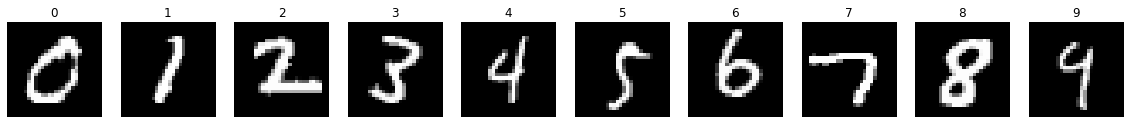

In [30]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np

x_train = train_set.data.numpy() # images
y_train = train_set.targets.numpy() # labels
labels_names = list(map(str, range(10)))
plt.figure(figsize = (20.0, 20.0))  
for i in range(10):  # for all classes (0 to 9)
  label_indexes = np.where(y_train == i)[0] # get indexes for each class 
  index = np.random.choice(label_indexes)
  img = x_train[index]

  plt.subplot(1, 10, i + 1)  
  plt.title(labels_names[i])  
  plt.axis("off")  
  imshow(img,cmap='gray')  

В PyTorch для создания нейронных сетей требуется отнаследоваться от класса nn.Module и переопределить метод forward, в который подаются входные данные, и ожидаются выходные данные.

[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)

В класс мы добавляем две переменные, два слоя Linear. Linear -это слой, позволяющий, умножить веса на входной вектор и добавить смещение. Первый параметр - размер входного вектора, второй - размер выходного.

В методе forward мы указываем последовательность применения операций для получения результата. Сначала изменим представление входного вектора, чтобы от изменения batch_size у нас ничего не сломалось.

Далее идёт первый слой, после него функция активации relu и второй слой, возвращающий вектор длиной 10, означающий принадлежность к одному из классов.

In [31]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128) 
        self.fc2 = nn.Linear(128, 10)
        self.activation = nn.ReLU()

    def forward(self, x): # Called inside __call__ method
        x = x.view(-1, 28*28) # "reshape" image to vector
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

Наследование от nn.Module позволяет обращаться к параметрам сети через model.parameters(), а так же упростить много других вещей. **Это критически удобно для обучения сетей**

Второй вариант последовательного выполнения слоёв сети - [nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) - объединение слоёв, вход одного слоя попадает в следующий.

In [32]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
                                     nn.Linear(28*28, 128),
                                     nn.ReLU(),
                                     nn.Linear(128, 10)
                                    )
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.layers(x)
        return x

In [33]:
model = Net()

Определим нашу лосс-функцию

In [34]:
criterion = nn.CrossEntropyLoss()

Определим оптимайзер для нашей сети. Оптимайзер, в библиотеках для нейронных сетей - это сущность, осуществляющая градиентный спуск. Подробнее об оптимайзере будет рассказано в дальнейших лекциях.

In [35]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Обучим сеть десять эпох

In [36]:
from tqdm import trange

num_epochs = 10
loss_hist = [] # for plotting
epochs = trange(num_epochs)
for epoch in epochs:
    hist_loss = 0
    for _, batch in enumerate(train_loader, 0): # get batch
        # обрабатываем batch 
        imgs, labels = batch
        # Зануляем градиенты
        optimizer.zero_grad() 
        # получаем выходы сети
        pred = model(imgs) 
        # вычисляем loss
        loss = criterion(pred, labels)
        # вычисляем градиенты
        loss.backward() 
        # выполняем один шаг оптимизатора (обновляем параметры сети)
        optimizer.step()
        hist_loss += loss.item()
    loss_hist.append(hist_loss / len(train_loader))
    epochs.set_description(f"Epoch={epoch}  loss={loss_hist[epoch]:.4}")

Epoch=9  loss=0.4065: 100%|██████████| 10/10 [01:52<00:00, 11.26s/it]


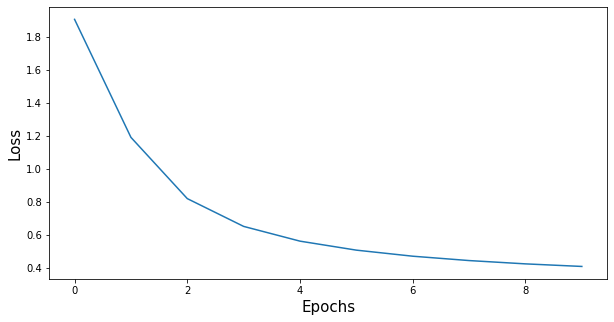

In [37]:
plt.figure(figsize = (10, 5))
plt.plot(range(num_epochs), loss_hist)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.show()

Давайте посчитаем accuracy.

Помните, что accuracy является частным случаем метрики качества, поэтому она не реализована в pytorch и поэтому с ней нужно быть аккуратней.

In [38]:
def calaculate_accuracy(model, data_loader):
    correct, total = 0, 0 
    with torch.no_grad(): 
        for batch in data_loader: # get batch
            imgs, labels = batch # parse batch
            pred = model(imgs) # get output
            _, predicted = torch.max(pred.data, 1) # get predicted class
            total += labels.size(0) # all examples
            correct += (predicted == labels).sum().item() # correct predictions 
    return correct / total 

In [39]:
acc_train = round(calaculate_accuracy(model, train_loader), 2)
print(f"Accuracy train = {acc_train}")
acc_test = calaculate_accuracy(model, test_loader)
print(f"Accuracy test = {acc_test}")

Accuracy train = 0.89
Accuracy test = 0.8955


**Задание 1!**  Дополните архитектуру нейросети. Постройте модель нейронной сети состоящую из трех полносвязных слоев, два из которых размера 128 с функцией активации ReLU, третий 10. В качестве ответа принимается значение **Accuracy test**.


In [41]:
class Net_Big(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
                                    nn.Linear(28*28, 128),
                                    nn.ReLU(),
                                    nn.Linear(128, 128),
                                    nn.ReLU(),
                                    nn.Linear(128, 10)
                                    )
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.layers(x)
        return x

torch.manual_seed(0)
np.random.seed(0)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
model = Net_Big()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10
loss_hist = [] # for plotting
epochs = trange(num_epochs)
for epoch in epochs:
    hist_loss = 0
    for _, batch in enumerate(train_loader, 0): # get batch
        # обрабатываем batch 
        imgs, labels = batch
        # Зануляем градиенты
        optimizer.zero_grad() 
        # получаем выходы сети
        pred = model(imgs) 
        # вычисляем loss
        loss = criterion(pred, labels)
        # вычисляем градиенты
        loss.backward() 
        # выполняем один шаг оптимизатора (обновляем параметры сети)
        optimizer.step()
        hist_loss += loss.item()
    loss_hist.append(hist_loss / len(train_loader))
    epochs.set_description(f"Epoch={epoch}  loss={loss_hist[epoch]:.4}")

acc_train = round(calaculate_accuracy(model, train_loader), 2)
print(f"Accuracy train = {acc_train}")
acc_test = calaculate_accuracy(model, test_loader)
print(f"Accuracy test = {acc_test}")

Epoch=9  loss=0.4296: 100%|██████████| 10/10 [01:59<00:00, 11.96s/it]


Accuracy train = 0.88
Accuracy test = 0.8888


Как видно, точность не улучшилась на тестовом наборе данных, скорее всего из-за слишком большого количества параметров наша сеть переобучилась.

Поэтапно пропустим тестовые изображения через модель и визуализируем результат

In [42]:
# get batch
imgs, labels = next(iter(test_loader))
print('imgs shape: ', imgs.shape)

imgs shape:  torch.Size([64, 1, 28, 28])


In [43]:
# get output
pred = model(imgs)
print('pred shape: ', pred.shape)

pred shape:  torch.Size([64, 10])


In [44]:
# First sample in prediction batch
pred[0]

tensor([ 0.1651, -2.6829, -0.2800,  2.8484, -0.9431,  0.4134, -6.6109,  9.6454,
        -0.7775,  4.4698], grad_fn=<SelectBackward0>)

In [45]:
# Calculate probabilities
nn.Softmax(dim=0)(pred[0].detach())

tensor([7.5803e-05, 4.3937e-06, 4.8576e-05, 1.1093e-03, 2.5027e-05, 9.7169e-05,
        8.6486e-08, 9.9300e-01, 2.9534e-05, 5.6130e-03])

In [46]:
# remove axis
imgs = torch.reshape(imgs, (64, 28, 28))
print('imgs shape(after reshape): ', imgs.shape)

imgs shape(after reshape):  torch.Size([64, 28, 28])


In [47]:
# take 10 first images
imgs = imgs[:10]
print('imgs shape: ', imgs.shape)

imgs shape:  torch.Size([10, 28, 28])


In [48]:
pred = pred[:10].detach()
print('Prediction(1 sample):\n', pred[0])
digits = np.argmax(pred.numpy(), axis=1)
print('Predicted class: ', digits[0])

Prediction(1 sample):
 tensor([ 0.1651, -2.6829, -0.2800,  2.8484, -0.9431,  0.4134, -6.6109,  9.6454,
        -0.7775,  4.4698])
Predicted class:  7


Визуализируем изображения, подпишем предсказанное и истинное значение:

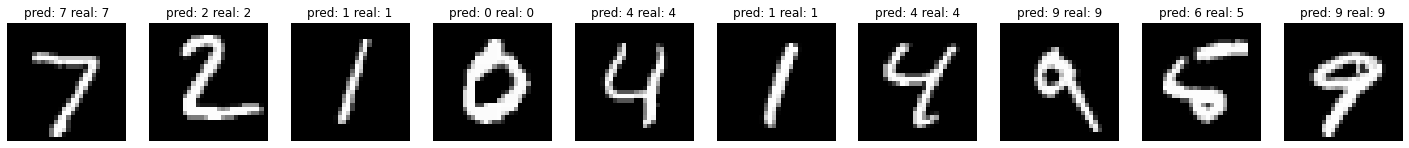

In [49]:
plt.figure(figsize = (25.0, 25.0))
for i in range(10):
  img = imgs[i]

  plt.subplot(1, 10, i + 1)
  plt.title('pred: ' + str(digits[i]) + ' real: '+str(labels[i].numpy())) # predicted and real values
  plt.axis("off")
  imshow(img.numpy(),cmap='gray') 


 <font size="6">Ссылки:</font>

[StatSoft. Радиальная базисная функция](http://statsoft.ru/home/textbook/modules/stneunet.html#radial)

[Важность функции потери в машинном обучении](https://towardsdatascience.com/importance-of-loss-function-in-machine-learning-eddaaec69519#:~:text=At%20its%20core%2C%20a%20loss,to%20minimize%20the%20loss%20function.)

[Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names](https://gombru.github.io/2018/05/23/cross_entropy_loss/)

[Функции активации нейросети: сигмоида, линейная, ступенчатая, ReLu, tahn](https://neurohive.io/ru/osnovy-data-science/activation-functions/)

[Объясненные современные функции активации: GELU, SELU, ELU, ReLU и другие](https://mlfromscratch.com/activation-functions-explained/)

# 3. Введение в сверточные нейронные сети


## Полносвязная нейронная сеть 
Fully-connected Neural Network (FCN). В современных статьях чаще используется термин Multilayer Perceptron (MLP).

Мы рассмотрели следующий подход для классификации изображений:

1. Превращаем исходные данные в вектор. 

>***Примечание***: при обработке цветного изображения размером $32\times32$ пикселя ($32\times32\times3$), размерность входного вектора будет равна $3072$. Однако, в общем случае, модель получает на вход набор одноразмерных векторов (матрицу), потому при обработке одного изображения размер матрицы будет $3072\times1$.

2. Перемножаем матрицу данных с матрицей весов. Размер последней может быть, например, $100\times3072$. Где $3072$ - размер входного вектора, а $100$ - количество признаков, которое мы хотим получить. Результат обработки одного изображения будет иметь размер $100\times1$.

3. Поэлементно применяем к полученной матрице нелинейную функцию (функцию активации), например Sigmoid или ReLU. Размерность данных при этом не меняется ($100\times1$). В результате получаем вектор активаций или признаков.

4. Используем полученные признаки как входные данные для нового слоя. Количество весов слоя будет зависеть от размерности входной матрицы и того, что мы хотим получить на выходе. Если мы делаем классификатор на $10$ классов, то матрица весов должна иметь размерность $10\times100$, и на этом можно остановиться. Но в общем случае количество слоев может быть произвольным.


<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/fully_connected_neural_network.png" width="600">


На изображении представлена описанная выше нейронная сеть, функцией активации в которой является ReLU. Добавление второго слоя позволило модели использовать более одного шаблона на класс. Можно убедиться в этом, обучив модель на датасете CIFAR-10 и визуализировав веса первого слоя модели.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/mlp_templates.jpg" width="700">

За счёт создания нескольких шаблонов для каждого из классов, многослойные архитектуры в общем случае показывают более высокую, чем перцептроны, эффективность на задачах классификации изображений. Однако подход с использованием многослойного перцептрона также имеет свои недостатки. Чтобы обнаружить их, присмотримся к происходящему с данными при предобработке.

## Нарушение связей между соседними пикселями

Единственным этапом предобработки данных при использовании многослойного перцептрона является превращение изображения в вектор. Основной его проблемой является "потеря связи" между соседними пикселями, что показано на изображении ниже. В общем случае, значения из соседних пикселей могут оказаться на большом расстоянии внутри результирующего вектора. 

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/img_to_vector_problem.png" width="600">

Словом, после преобразования, мы теряем информацию о взаимном расположении значений на исходном изображении - при подборе весов никак не используется информация о том, что какие-то значения были \"близки\" друг к другу на исходном изображении. При этом мы, люди, понимаем важность взаимосвязей между пикселями

К примеру, набор тёмных пикселей находящихся поблизости внутри изображения может сообщить нам, что там располагается некий тёмный объект. Если же мы преобразуем изображение в вектор и эти значения "разбросает" по нему без сохранения пространственной структуры, то новому наблюдателю будет очень сложно понять, что где-то на исходном изображении была тёмная зона.  



Идея полносвязной нейронной сети пришла к нам из математической модели восприятия информации мозгом ([перцептрон Розенблатта](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D0%B5%D1%80%D1%81%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD)). Возможно, чтобы получить хорошие результаты при обработке изображений, нужно посмотреть, как работает человеческий глаз? 


### Рецептивное поле
Когда мы смотрим на объект, мы видим свет, который:
- отражается от объекта, 
- проходит сложную оптическую систему для настройки яркости и фокусировки (нам это не интересно, т.к. эту задачу по большей части решает настройка фотоаппарата),
- попадает на сетчатку, которая преобразует этот свет в нервные импульсы, которые передаются мозгу по зрительному тракту (звучит, как то, что нам надо).

Посмотрим, как работает сетчатка:
1. Свет возбуждает фоторецепторы сетчатки (палочки и колбочки).
2. Биполярные клетки собирают информацию с группы близко расположенных рецепторов, преобразуют ее и передают дальше. Каждая биполярная клетка возбуждается при определенной комбинации сигналов от связанных с ней рецепторных клеток. По сути она ищет некоторый не сложный, локально расположенный паттерн в изображении, попавшем на сетчатку. 
3. Клетки уровнем выше собирают информацию с нескольких близко расположенных биполярных клеток и активируются при уникальной комбинации сигналов с них.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/L06_perceptual_field_retina.png" width="700">


В такой системе появляется понятие **рецептивного поля** нейрона. 

**Рецептивное поле** нейрона - это участок с рецепторами с которых он прямо или опосредованно, через другие нейроны, получает информацию. В случае глаза - рецептивное поле будет локализовано в некоторой области сетчатки глаза. При удалении от сетчатки рецептивное поле нерона будет увеличиваться в каждом следующем слое неронов: рецептивное поле ганглиозной клетки будет больше чем у биполярной. 



### Фильтрация изображений 

Идея обработки изображения, путем преобразования пикселя с учетом значений соседних пикселей широко применяется в обработке изображений. Такое преобразование называют **фильтрацией**. Вы наверняка слышали о наложении фильтров на изображения, если работали в графических редакторах, например, в Photoshop. 

При фильтрации одно и то же преобразование применяется к каждому участку изображения. Это можно представить, как некоторый паттерн, который скользит по изображению и вычисляет итоговое значение. 

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_with_filter.gif" width="300">

## Примеры 'hand-crafted' фильтров

Для реализации идеи локальности при обработке данных используется операция свёртки. Свёртка требует тензор параметров - \"ядро свёртки\", также называемое фильтром. 

В течение долгого времени веса в фильтрах подбирались вручную. Этого было достаточно для простой обработки изображений. Например, к таким фильтрам можно отнести фильтр Гаусса, фильтр Собеля, детекторы углов.

## Свертка с фильтром

По сути своей, операция свёртки - это та же самая взвешенная сумма с добавлением свободного члена, используемая в полносвязных линейных слоях. 

Ключевое отличие между линейным слоем и свёрткой заключается в том, что линейный слой получает на вход всё изображение, тогда как свёртка - небольшие фрагменты изображения. То есть, если при обработке линейным слоем всё изображение сравнивалось с шаблонами, то теперь лишь небольшие фрагменты изображения сравниваются с шаблонами.

К примеру, на GIF ниже можно увидеть, как фильтр размером $3\times3$ применяется к одноканальному изображению размером $5\times5$. Шаблон имеет форму x-образного креста. В правой части можно увидеть, насколько фрагмент изображения под фильтром совпадает с шаблоном внутри фильтра.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_with_filter.gif" width="300">

Реализуем это в коде:

In [50]:
img = torch.Tensor([[1,1,1,0,0],
                    [0,1,1,1,0],
                    [0,0,1,1,1],
                    [0,0,1,1,0],
                    [0,1,1,0,0]])

kernel = torch.Tensor([[1, 0, 1],
                       [0, 1, 0],
                       [1, 0, 1]])

result = torch.zeros((3,3)) # img - kernel + 1 (5 - 3 + 1 = 3)

for i in range(0, result.shape[0]):
    for j in range(0, result.shape[1]):
        segment = img[i:i+kernel.shape[0], 
                        j:j+kernel.shape[1]]
        result[i, j] = torch.sum(segment * kernel)

print(f'img shape: {img.shape}')
print(f'kernel shape: {kernel.shape}')
print(f'result shape: {result.shape}')
print(f'result:\n{result}')

img shape: torch.Size([5, 5])
kernel shape: torch.Size([3, 3])
result shape: torch.Size([3, 3])
result:
tensor([[4., 3., 4.],
        [2., 4., 3.],
        [2., 3., 4.]])


# 4. Сверточный слой нейросети

## Основные параметры свёртки

Как уже упоминалось ранее, по сути, операция свёртки представляет из себя вычисление взвешенной суммы со свободным членом, что довольно сильно напоминает линейный слой с тем лишь отличием, что последний применяется ко всем данным, а не к их части. Тем не менее, подобно линейному слою, операцию свёртки можно встроить в нейросеть и, путём градиентного спуска, подбирать параметры свёртки. 

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/img_and_convolution_filter.png" width="300">

Реализуем операцию свертки с помощью линейного слоя:

In [51]:
import torch
import torch.nn as nn

local_linear = nn.Linear(9, 1, bias=False) # 9 = 3 * 3 (weights shape: (3,3))

img = torch.Tensor([[1,1,1,0,0],
                    [0,1,1,1,0],
                    [0,0,1,1,1],
                    [0,0,1,1,0],
                    [0,1,1,0,0]])
# kernel weights
weights = torch.Tensor([[1, 0, 1],
                       [0, 1, 0],
                       [1, 0, 1]])

local_linear.weight = nn.Parameter(weights.reshape(-1)) # set weights 

result = torch.zeros((3,3)) # img - kernel + 1 (5 - 3 + 1 = 3)

for i in range(0, result.shape[0]):
    for j in range(0, result.shape[1]):
        segment = img[i:i+weights.shape[0], 
                        j:j+weights.shape[1]].reshape(-1)
        result[i, j] = local_linear(segment)

print(f'img shape: {img.shape}')
print(f'weights shape: {weights.shape}')
print(f'result shape: {result.shape}')
print(f'result:\n{result}')

img shape: torch.Size([5, 5])
weights shape: torch.Size([3, 3])
result shape: torch.Size([3, 3])
result:
tensor([[4., 3., 4.],
        [2., 4., 3.],
        [2., 3., 4.]], grad_fn=<CopySlices>)


### Обработка цветных/многоканальных изображений

В примерах выше мы рассматривали [черно-белые](https://ru.wikipedia.org/wiki/%D0%A7%D1%91%D1%80%D0%BD%D0%BE-%D0%B1%D0%B5%D0%BB%D0%B0%D1%8F_%D1%84%D0%BE%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D1%8F) изображения. Их также называют одноканальными изображениями, т.к. в них цвет пикселя определяется одним числом, характеризующим яркость.

Однако, на практике часто сталкиваются с трехканальными цветными [RGB](https://ru.wikipedia.org/wiki/RGB) изображениями, в которых цвет пикселя определяется тремя числами, характеризующими три основных цвета (красный, зеленый и синий). 

Анализируемое изображение может иметь и большее количество каналов. Например: марсоход Opportunity для получения изображений использовал [13 фильтров](https://habr.com/ru/post/160621/).  

В общем случае, изображение имеет размер $C \times H\times W$. К примеру, изображения из датасета CIFAR-10 имеют размер $3\times32\times32$.  

При обработке подобных изображений, используется уже не матрица, а трёхмерный тензор. Ниже демонстрируется процесс обработки фрагмента трёхмерного изображения фильтром размерности $3\times3$:

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/rgb_image_and_convolution_filter.png" width="400">


Результатом свертки входного тензора с одним фильтром будет карта признаков с глубиной 1, вне зависимости от количества каналов входного тензора.

Во время прямого прохода фильтр перемещается по ширине и высоте входного тензора и вычисляются скалярные произведения между значениями фильтра и соответствующими значениями входного тензора. Так формируется двумерная карта признаков, которая содержит результат применения данного фильтра к каждой из областей входного тензора.

В качестве входного тензора можно использовать не изображение, а результат предыдущего сверточного слоя. 


<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_filter_forward_pass.png" width="200">

In [52]:
img = torch.randn((3, 8, 8)) # 3-num of channels, (8,8)-img size
kernel = torch.randn((3, 3, 3)) # 3-num of filters, (3,3)-kernel size

result = torch.zeros(6, 6) # 8 - 3 + 1 = 6

for i in range(result.shape[0]):
  for j in range(result.shape[1]):
    segment = img[:, 
                    i:i+kernel.shape[0], 
                    j:j+kernel.shape[1]]
    result[i, j] = torch.sum(segment * kernel)

print(f'img shape: {img.shape}')
print(f'kernel shape: {kernel.shape}')
print(f'result shape: {result.shape}')

img shape: torch.Size([3, 8, 8])
kernel shape: torch.Size([3, 3, 3])
result shape: torch.Size([6, 6])


### Использование нескольких фильтров

Подобно тому, как в перцептроне использовались несколько выходных нейронов, чтобы передать информацию о сходстве входного вектора с различными шаблонами, можно использовать несколько фильтров при свёртке. То есть, выполнять свёртку несколько раз ($C_{out}$, по количеству фильтров)  с разными фильтрами. В результате появится несколько карт признаков, имеющих размер $1\times H_{out}\times W_{out}$. При объединении этих карт будет получен тензор размерности $C_{out}\times H_{out} \times W_{out}$, где $C_{out}$ - количество фильтров, а также количество "каналов" в полученном представлении. Полученное представление может быть без проблем передано для следующей операции свёртки. 

На изображении ниже продемонстрирован результат применения сверточного слоя, содержащего $5$ фильтров, к изображению из CIFAR-10. 

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_layer_with_5_filters.png" width="400"> 

В свёрточном слое указаны параметры, необходимые для создания ядра свёртки - количество каналов во входном представлении `in_channels` и размер ядра свёртки `kernel_size`. Также в нём необходимо указывать количество используемых фильтров `out_channels`. Стоит отметить, что, в отличие от полносвязанного слоя, свёрточный слой не требует информации о количестве значений во входном представлении и может быть использован как для представлений $C_{in} \times 32 \times 32$, так и $C_{in} \times 100 \times 100$. Словом, представления могут иметь практически любой размер, главное чтобы пространственные размеры не были меньше размеров ядра свёртки.


In [59]:
conv = torch.nn.Conv2d(in_channels=3,  # Количество входных каналов (3 для RGB изображений)
                       out_channels=5, # Количество фильтров/выходных каналов
                       kernel_size=3)

img = torch.randn((1, 3, 100, 100)) # 1-размер батча, 3-количество каналов, (100,100)-размер изображения
print(f'img shape: {img.shape}')

out = conv(img)
print(f'out shape: {out.shape}') # [1, 5, 98, 98]

img shape: torch.Size([1, 3, 100, 100])
out shape: torch.Size([1, 5, 98, 98])


### Уменьшение размера представлений

Заметим, что при свёртке ширина $W_{out}$ и высота $H_{out}$ **карты признаков** будут отличаться от **пространственных размерностей** $W_{in}$ и $H_{in}$ исходного тензора. К примеру, при обработке трёхканального тензора размера $32 \times 32$ ядром размера $5 \times 5$, можно будет произвести лишь $27$ сдвигов $(32 - 5)$ по вертикали и столько же - по горизонтали. Но при этом размер итоговой карты признаков будет равен $28 \times 28$, поскольку первый ряд (либо столбец) можно получить без сдвигов по вертикали либо горизонтали, соответственно. При повторном применении фильтра, размер каждой из сторон уменьшится ещё на $4$. Итоговое значение $N'$ пространственной размерности $N$ при размере стороны фильтра $F$ вычисляется по следующей формуле: $N' = N - F + 1$.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/decrease_size_of_image_after_convolution.png" width="700">

In [54]:
conv_1 = torch.nn.Conv2d(in_channels=3, # Number of input channels (3 for RGB images)
                       out_channels=6, # Number of filters/output channels
                       kernel_size=5)

conv_2 = torch.nn.Conv2d(in_channels=6, # Number of input channels (3 for RGB images)
                              out_channels=10, # Number of filters/output channels
                              kernel_size=5)

img = torch.randn((1, 3, 32, 32)) # 1-batch size, 3-num of channels, (32,32)-img size
print(f'img shape: {img.shape}')

out_1 = conv_1(img)
print(f'out_1 shape: {out_1.shape}') # [1, 6, 28, 28]

out_2 = conv_2(out_1)
print(f'out_2 shape: {out_2.shape}') # [1, 10, 24, 24]

img shape: torch.Size([1, 3, 32, 32])
out_1 shape: torch.Size([1, 6, 28, 28])
out_2 shape: torch.Size([1, 10, 24, 24])


Заметим, что при уменьшении размера представлений пиксели, находящиеся около краёв, участвуют в значительно меньшем количестве свёрток, чем пиксели в середине, хотя информация в них не обязательно менее ценна, чем информация из центральных пикселей. К примеру, пиксель в верхнем левом углу представления вне зависимости от размера фильтра будет принимать участие лишь в одной свёртке и информация о нём будет сохранена лишь в верхнем левом углу нового представления. 

### Расширение (padding)  

Для борьбы с описанной выше проблемой применяется *паддинг(дополнение)* входного тензора (англ. *padding*). В ходе него ширина и высота тензора увеличиваются за счёт приписывания столбцов и строк с некими значениями. К примеру, на изображении ниже перед свёрткой ядром размера $3\times3$ был применён padding нулями размера 1.  

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/padding.png" width="250">

На примере убедимся, что это позволит нам сохранить пространственные размерности тензоров.

In [55]:
img = torch.randn((1, 1, 5, 5)) # create random image
print(f'Original tensor:\nshape:{img.shape}:\n {img}')

# add zeros to image manually
padded_img = torch.zeros((1, 1, 7, 7)) # create zeros array to insert image in center
padded_img[:, :, 1:-1, 1:-1] += img # insert image, we get image arounded by zeros
print(f'\nPadded tensor:\nshape:{padded_img.shape}:\n {padded_img}')

# define two conv layers to check results
conv_3 = torch.nn.Conv2d(in_channels=1, 
                        out_channels=1, 
                        kernel_size=3)
conv_5 = torch.nn.Conv2d(in_channels=1, 
                        out_channels=1, 
                        kernel_size=5)
# use layers separately, to compare results
conved_3 = conv_3(img)
conved_5 = conv_5(img)

conved_pad_3 = conv_3(padded_img)
conved_pad_5 = conv_5(padded_img)

print('\n\nOriginal shape:', img.shape)
print('Shape after convolution layer(kernel 3x3):', conved_3.shape)
print('Shape after convolution layer(kernel 5x5):', conved_5.shape)

print('\n\nPadded shape:', padded_img.shape)
print('Shape after convolution with padding(kernel 3x3):', conved_pad_3.shape)
print('Shape after convolution with padding(kernel 5x5):', conved_pad_5.shape)

Original tensor:
shape:torch.Size([1, 1, 5, 5]):
 tensor([[[[-0.3385, -0.6182, -1.5873,  1.9790,  1.2129],
          [-2.5970,  1.4321, -0.4810,  0.6895,  0.9716],
          [ 1.5210, -1.4272, -0.8032,  0.8855, -0.4354],
          [ 0.3313, -1.1796,  0.2350,  0.4220,  0.1130],
          [ 0.4567,  0.7972,  1.9354,  0.1299,  0.3830]]]])

Padded tensor:
shape:torch.Size([1, 1, 7, 7]):
 tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -0.3385, -0.6182, -1.5873,  1.9790,  1.2129,  0.0000],
          [ 0.0000, -2.5970,  1.4321, -0.4810,  0.6895,  0.9716,  0.0000],
          [ 0.0000,  1.5210, -1.4272, -0.8032,  0.8855, -0.4354,  0.0000],
          [ 0.0000,  0.3313, -1.1796,  0.2350,  0.4220,  0.1130,  0.0000],
          [ 0.0000,  0.4567,  0.7972,  1.9354,  0.1299,  0.3830,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]])


Original shape: torch.Size([1, 1, 5, 5])
Shape after convolution layer(kernel 3x3):

Заметим, что дополнение одним рядом и одним столбцом не является универсальным решением: для фильтра размером 5 размер выходного тензора всё равно отличается от входного. Если мы немного видоизменим полученную выше формулу (используя размер дополнения $P$), то получим следующую формулу: $N' = N + 2\cdot P - F + 1$.  
Видно, для того чтобы пространственные размеры не изменялись ($N' = N$), для разных размеров фильтра требуются разные размеры паддинга. В общем случае, для размера фильтра $F$, требуемый размер дополнения  $\displaystyle P = \frac{F-1}{2}$. 


Важными терминами, связанными с паддингом, являются "*same padding*" - размер выходного тензора не отличается от размера входного тензора, а также "*valid padding*" - отсутствие паддинга.

```
"VALID" = без паддинга:

   inputs:         1  2  3  4  5  6  7  8  9  10 11 (12 13)
                  |________________|                dropped
                                 |_________________|
"SAME" = с паддингом нулями:

               pad|                                      |pad
   inputs:      0 |1  2  3  4  5  6  7  8  9  10 11 12 13|0  0
               |________________|
                              |_________________|
                                             |________________|
```

Ниже можно увидеть пример обработки RGB изображения с same padding (с использованием 0):

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_with_same_padding_rgb_image.gif" width="780">

Теперь реализуем padding, используя инструментарий torch и сравним его с ручным добавлением padding:

In [56]:
img = torch.randn((1, 1, 5, 5)) # define random image

# add zeros manually
padded_img = torch.zeros((1, 1, 7, 7)) 
padded_img[:, :, 1:-1, 1:-1] += img

# conv layer without padding (padding=0 by default)
conv_3 = torch.nn.Conv2d(in_channels=1, 
                        out_channels=1, 
                        kernel_size=3,
                        padding=0)

# conv layer with padding = 1 (add zeros)
conv_3_padded = torch.nn.Conv2d(in_channels=1, 
                                out_channels=1, 
                                kernel_size=3,
                                padding=1) # Padding added 1 zeros line to all four sides of the input
original = conv_3(padded_img)
padded = conv_3_padded(img)

print(f'Explicitly padded:\n {original.shape}\n {original}')
print(f'\nImplicitly padded:\n{padded.shape}\n  {padded}')
print("\nExplicitly padded shape = Implicitly padded shape")

Explicitly padded:
 torch.Size([1, 1, 5, 5])
 tensor([[[[-0.0224, -0.3034,  0.6105, -0.3022, -0.2212],
          [-0.0247, -0.5052,  1.3431, -0.4491,  0.2985],
          [-0.5165,  0.1385,  0.2581, -0.0557,  0.3634],
          [-0.6673,  0.1085, -0.3732,  0.4993,  0.2060],
          [ 0.2299, -0.1012, -0.1969, -0.4923, -0.7465]]]],
       grad_fn=<ConvolutionBackward0>)

Implicitly padded:
torch.Size([1, 1, 5, 5])
  tensor([[[[-0.5640, -0.2908,  0.8848, -1.5673,  0.1827],
          [-0.1940, -1.1566,  0.8592, -0.6665, -0.9448],
          [-0.8251,  0.2081, -0.4086,  0.0870, -0.2825],
          [-1.2169, -0.2425, -0.4090, -0.3501, -0.5286],
          [-0.3154, -1.0685, -0.2009, -0.2918, -0.2463]]]],
       grad_fn=<ConvolutionBackward0>)

Explicitly padded shape = Implicitly padded shape


### Изменение разметров карт признаков, при прохождении через свёрточный слой

Как мы успели рассмотреть выше, свёрточный слой нейросети осуществляет преобразование некоторого набора входных карт признаков в новый определенный набор выходных карт признаков. Выбор параметров ядра свёртки, числа входных и выходных каналов, величина и тип расширения (padding) полностью определяет "геометрию" данного преобразование.

На практике, при написании собственных нейронных сетей со свёрточными слоями, мы хотим последовательно пропускать изображение через несколько свёрточных слоёв: передавая полученные на выходе одного свёрточного слоя карты признаков на вход другому. 

Как уже отмечалось выше, свёрточные слои могут принимать на вход карты признаков произвольной ширины и высоты (главное, чтобы ширина и высота карты признаков после расширения (padding) была не меньше размера ядра свёртки) — таким образом, при последовательном соединении свёрточных слоёв остаётся обеспечить согласование числа карт признаков: количество карт признаков на выходе слоя должно равняться числу входных карт признаков следующего после него.

При построении некоторых архитектур CNN (например, для архитектуры [UNET](https://arxiv.org/abs/1505.04597)) важно явно контролировать пространственные размеры всех используемых карт признаков. Чтобы разобраться как происходит преобразование размеров карт признаков, обратимся к описанию класса [`torch.nn.Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#conv2d) из библиотеки PyTorch.

`torch.nn.Conv2d` принимает на вход тензор вида $(N, C_{in}, H, W)$, где $N$ нулевом измерении (как всегда) соответствует размерности батча, $C_{in}$ соответствует числу входных карт признаков, а $H$ и $W$ задают пространственные размеры входных карт признаков. На выходе мы получаем тензор вида $(N, C_{out}, H_{out}, W_{out})$, где количество выходных карт признаков $C_{out}$ задаётся при создании экземпляра класса `torch.nn.Conv2d`, а пространственные измерения выходных карт признаков $H_{out}$ и $W_{out}$ вычисляются на основе параметров ядра свёртки и размеров $H$ и $W$ входных карт признаков по формулам:

$$ H_{out} = \lfloor \frac{H + 2 \times \text{padding_h} - \text{dilation_h} \times (\text{kernek_size_h} - 1) -1}{\text{stride_h}}  + 1 \rfloor ,$$
$$ W_{out} = \lfloor \frac{W + 2 \times \text{padding_w} - \text{dilation_w} \times (\text{kernek_size_w} - 1) -1}{\text{stride_w}}  + 1 \rfloor ,$$

где
* `kernek_size_h` и `kernek_size_w` -- количество элементов ядра свёртки по ширине и высоте
* `padding_h` и `padding_w` --  параметры расширения выходной карты признаков нулями по ширине и высоте 
* `stride_h` и `stride_w` -- сдвиг свёртки по ширине и высоте, будет подробно рассмотрено ниже
* `dilation_h` и `dilation_w` -- расстояние между ядерными элементами(позволяет рассматривать только те пространственные элементы карты признаков, координаты которых кратны величинам сдвига по ширине и высоте; по умолчанию данная величина равна $1$ и в свёртке принимает участие вся карта признаков); С dilated convolutions мы подробнее познакомимся при рассмотрении CNN архитектур, используемых для семантической сегментации.

Интерактивный пример преобразования набора входных карт признаков свёрточным слоем:

In [57]:
#@title \<code block for conv2d visualization purposes\>
 
from torch import Tensor

from ipywidgets import interactive
import ipywidgets as widgets

import matplotlib.pyplot as plt
import seaborn as sns


def plot_featuremaps(
    featuremap_tensor : Tensor,
    title : str='',
    v_max : int=None
) -> None:
    n_maps, h, w = featuremap_tensor.shape[1:]
    fig, ax = plt.subplots(ncols=n_maps,
                           figsize=(5*n_maps, 5),
                           sharex=False,
                           sharey=False)
    
    featuremap_tensor = featuremap_tensor.detach()
    if n_maps > 1:
      for id_ax in range(n_maps):
          sns.heatmap(featuremap_tensor[0][id_ax], ax=ax[id_ax], annot=True, 
                      fmt="0.00f", cbar=False, vmin=0, vmax=v_max, linewidths=1)
    else:
        sns.heatmap(featuremap_tensor[0][0], ax=ax, annot=True, 
                    fmt="0.00f", cbar=False, vmin=0, vmax=v_max, linewidths=1)
    
    fig.suptitle(title)
    plt.show()


def conv2d_example(
    h_in : int = 8,
    w_in : int = 8,
    in_channels : int = 2,
    out_channels : int = 1,
    kernel_size_h : int = 3,
    kernel_size_w : int = 3,
    padding_h : int = 0,
    padding_w : int = 0,
    stride_h : int = 1,
    stride_w : int = 1,
    dilation_h : int = 1,
    dilation_w : int = 1,
) -> None:
    '''
      This function generates an example of the input
      feature maps tensor, passes it to a two-dimensional 
      convolution with the specified parameters and 
      unit weights, and then returns the resulting 
      feature maps output tensor.
    '''
    
    dummy_input = torch.tensor(
        [[list(range(h_in))]*w_in]*in_channels,
        dtype=torch.float
    ).unsqueeze(0) # Let's create an example input tensor like $(1, C_{in}, H. W)$

    conv_layer = nn.Conv2d(
        in_channels=in_channels,
        out_channels=out_channels,
        kernel_size=(kernel_size_h , kernel_size_w),
        padding=(padding_h, padding_w),
        stride=(stride_h, stride_w),
        dilation=(dilation_h, dilation_w),
        bias=False
    ) # Creating an instance of the 2D convolution class with the given parameters.
    
    conv_layer.weight = nn.Parameter(torch.ones_like(conv_layer.weight)) # Replace randow weights to ones
    output = conv_layer(dummy_input)
    print('\n\nExample of input feature maps:')
    plot_featuremaps(dummy_input,
                     f'input featuremap tensor\nshape = {dummy_input.shape}', 
                     v_max=h_in)

    print(f'\n\nconv kernel shape is {conv_layer.weight.shape}\n\n')

    print('Example of output feature maps:')
    plot_featuremaps(output, 
                     f'output featuremap tensor\nshape = {output.shape}')


conv2d_example_interactive = interactive(
    conv2d_example,
    h_in=widgets.IntSlider(min=3, max=16, step=1, value=8),
    w_in=widgets.IntSlider(min=3, max=16, step=1, value=8),
    in_channels=widgets.IntSlider(min=1, max=4, step=1, value=3),
    out_channels=widgets.IntSlider(min=1, max=4, step=1, value=2),
    kernel_size_h=widgets.IntSlider(min=1, max=8, step=1, value=3),
    kernel_size_w=widgets.IntSlider(min=1, max=8, step=1, value=3),
    padding_h=widgets.IntSlider(min=0, max=8, step=1, value=0),
    padding_w=widgets.IntSlider(min=0, max=8, step=1, value=0),
    stride_h=widgets.IntSlider(min=1, max=8, step=1, value=1),
    stride_w=widgets.IntSlider(min=1, max=8, step=1, value=1),
    dilation_h=widgets.IntSlider(min=1, max=8, step=1, value=1),
    dilation_w=widgets.IntSlider(min=1, max=8, step=1, value=1)
)

In [58]:
display(conv2d_example_interactive)

interactive(children=(IntSlider(value=8, description='h_in', max=16, min=3), IntSlider(value=8, description='w…

## Использование свёрточных слоёв

### Свёрточный слой = свёртка + активация

Поскольку операция свертки является линейной, аналогично полносвязному слою, к выходу сверточного слоя применяется* функция активации (например, ReLU).

>*Так как функция активации применяется к тензору поэлементно, не важно, какую именно форму имеет тензор, а значит и какой слой находился передней ней: полносвязанный или сверточный. 

In [60]:
input = torch.randn((1, 3, 32, 32))

model = torch.nn.Sequential(
                           nn.Conv2d(in_channels=3,
                                     out_channels=6,
                                     kernel_size=3), # after conv shape: [1,6,30,30]
                           nn.ReLU(), # Activation doesn't depend on input shape
                           nn.Flatten(), # 6*30*30=5400
                           nn.Linear(5400, 100), 
                           nn.ReLU(),  # Activation doesn't depend on input shape
                           nn.Linear(100, 10) # 10 classes, like a cifar10
                           )

out = model(input)
print(f'out shape: {out.shape}')
print(f'out:\n{out}')

out shape: torch.Size([1, 10])
out:
tensor([[-0.0515, -0.1303, -0.0942,  0.1098, -0.1026,  0.0272, -0.2478, -0.1555,
         -0.0861,  0.1687]], grad_fn=<AddmmBackward0>)


>Отметим, что внутри нейросети появляется новый слой - `nn.Flatten()`. Он необходим, поскольку полносвязанный слой принимает на вход набор векторов значений, тогда как свёрточный слой возвращает набор трёхмерных тензоров. `nn.Flatten()` необходим, чтобы преобразовать набор тензоров в набор векторов. Эту же операцию можно было бы выполнить с помощью метода `.view(-1)`.

### Общая структура свёрточной нейронной сети

Нейросетевая модель из предыдущего примера позволяет в общем случае понять структуру свёрточных нейронных сетей: после некоторого количества свёрточных слоёв, извлекающих локальную пространственную информацию, идут полносвязанные слои (как минимум в количестве одного), сопоставляющие извлечённую информацию. 

Внутри свёрточных слоёв происходит следующий процесс: первые слои нейронных сетей имеют малые рецептивные поля, т.е. им соответствует малая площадь на исходном изображении. Такие нейроны могут активироваться лишь на некие простые шаблоны, по типу углов или освещённости.
 Активации уровнем выше уже имеют большие рецептивные поля, в результате чего в картах активации может сохраняться информация о более нетривиальных геометрических фигурах. С каждым слоем свёрточной нейронной сети рецептивные поля увеличиваются, увеличивается и сложность шаблонов, на которые может реагировать слой. В некоторых случаях, рецептивное поле нейронов может быть размером со всё исходное изображение. Пример можно увидеть на схеме ниже.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/receptive_field_size.png" width="700">

Если изначально рецептивное поле имело размер $1\times1$, то после свёртки фильтром $K\times K$, оно стало иметь размер $K \times K$. То есть, рецептивное поле каждого нейрона увеличилось на $K-1$ по каждому из направлений. Не сложно самостоятельно убедиться, что данная закономерность сохранится при дальнейшем применении фильтров того или иного размера.

Однако, при больших размерах изображений (к примеру, $1024\times1024$), нейронная сеть становится очень глубокой, что приводит к появлению большого количества параметров. Тем не менее, рецептивное поле каждого из нейронов растить нужно, что делается путём искусственного увеличения рецептивного поля каждого из элементов тензора. В принципе, это можно сделать двумя принципиально разными способами, о примере каждого из которых мы и поговорим:  
1. Доработать операцию свёртки, чтобы рецептивное поле росло быстрее
2. Добавить некую промежуточную операцию, которая бы увеличивала рецептивные поля

### Шаг свёртки (Stride)

Вариантом доработки свёртки с целью увеличения рецептивного поля нейрона является изменение шага фильтра. Ранее фильтры двигались с шагом 1 по горизонтали и 1 по вертикали, то есть зоны применения фильтров были сдвинуты друг относительно друга на 1 строку либо столбец. При увеличении шага, количество применений фильтра изменяется. 

<center><img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_parameter_stride.gif" width="350"></center>
<center>Свёртка массива $5\times5$ фильтром размером $3\times3$ с шагом $2$ по вертикали и горизонтали.</center>

Казалось бы, с увеличением шага $S$ рецептивное поле не выросло - как увеличивалось с $1$ до $K$, так и увеличивается. Однако обратим внимание на иное: если раньше размерность $N$ становилась $N - F + 1$, то теперь она станет $\displaystyle 1 + \frac{N-F}{S}$. В результате, если раньше следующий фильтр с размером $K'$ имел рецептивное поле в $\displaystyle N \cdot \frac{K'}{N'} = N \cdot \frac{K'}{N - F + 1}$, то теперь $\displaystyle N \cdot \frac{K'}{N'} = N \cdot \frac{K'}{1 + \frac{N-F}{S}}$. Понятно, что $\displaystyle \frac{K'}{N - F + 1} \leq \frac{K'}{1 + \frac{N-F}{S}}$, потому рецептивное поле каждого нейрона увеличивается.

При этом важно заметить, что в некоторых случаях часть данных может не попасть в свёртку. К примеру, при $N = 7,\, K = 3,\, S = 3$. В данном случае, $\displaystyle N' = 1 + \frac{7 - 3}{3} = 2\frac13.$ В подобных ситуациях часть изображения не захватывается, в чём мы можем убедиться на наглядном примере:

In [61]:
# Create torch tensor 7x7
input = torch.tensor([[[[1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99]]]], dtype=torch.float)

print(f'input shape: {input.shape}')

conv = torch.nn.Conv2d(in_channels=1, # Number of channels
                       out_channels=1, # Number of filters
                       kernel_size=3, 
                       stride=3,
                       bias=False # Don't use bias
                       )
conv.weight  = torch.nn.Parameter(torch.ones((1, 1, 3, 3))) # Replace randow weights to ones
out = conv(input) 

print(f'out shape: {out.shape}')
print(f'out:\n{out}')

input shape: torch.Size([1, 1, 7, 7])
out shape: torch.Size([1, 1, 2, 2])
out:
tensor([[[[9., 9.],
          [9., 9.]]]], grad_fn=<ConvolutionBackward0>)


### Уплотнение (Субдискретизация, Pooling)

Другим вариантом стремительного увеличения размера рецептивного поля является использование дополнительных слоёв, требующих меньшее количество вычислительных ресурсов. Слои субдискретизации прекрасно выполняют эту функцию - подобно свёртке, производится разбиение изображения на небольшие сегменты, внутри которых выполняются операции, не требующие использования обучаемых весов. Два популярных примера подобных операций: получение максимального значения (max pooling) и получение среднего значения (average pooling). 


Аналогично разбиению на сегменты при свёртке, слои пуллинга имеют два параметра: размер фильтра $F$ (то есть, каждого из сегментов) и шаг $S$ (stride). Аналогично свёрткам, при применении пуллинга, формула размера стороны будет $\displaystyle N' = 1+ \frac{N-F}{S}.$

Ниже приведён пример использования обоих пуллингов при обработке массива.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/subdiscretization_pooling.png" width="600">

Реализуем это в коде:

In [62]:
# create tensor 4x4
input = torch.tensor([[[
                     [1, 1, 2, 4],
                     [5, 6, 7, 8],
                     [3, 2, 1, 0],
                     [1, 2, 3, 4],
                     ]]], dtype=torch.float)

max_pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
avg_pool = torch.nn.AvgPool2d(kernel_size=2, stride=2)

print("Input:\n", input)
print("Max pooling:\n", max_pool(input))
print("Average pooling:\n", avg_pool(input))

Input:
 tensor([[[[1., 1., 2., 4.],
          [5., 6., 7., 8.],
          [3., 2., 1., 0.],
          [1., 2., 3., 4.]]]])
Max pooling:
 tensor([[[[6., 8.],
          [3., 4.]]]])
Average pooling:
 tensor([[[[3.2500, 5.2500],
          [2.0000, 2.0000]]]])


**Важно отметить**, что, в отличие от свёрток, pooling выполняется по каждому из каналов отдельно, в результате чего количество каналов не меняется, в отличие от применения фильтра при свёртке. К примеру, ниже можно увидеть визуализация применения max pooling к одному из каналов тензора, имеющего $64$ канала. 

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/changing_size_of_image_after_pooling.png" width="350">

### Свёртка фильтром $1\times1$

Оба упомянутых выше метода позволяют сделать архитектуру сети не слишком глубокой, путём быстрого увеличения рецептивного поля нейронов, что позволяет уменьшить число обучаемых обучаемых параметров модели. Познакомимся с ещё одним способом уменьшения числа обучаемых параметров модели. 


Рассмотрим фрагмент архитектуры CNN, состоящий из одного свёрточного слоя с размерами ядра свёртки $F_h\times F_w$ и некоторой активации (например, [`torch.nn.ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)):


$$... \rightarrow (N, C_{in}, H, W) \rightarrow \text{conv2d}_{F_h\times F_w} \rightarrow \text{ReLu} \rightarrow  (N, C_{out}, H', W')  \rightarrow ... $$

Так как обучаемыми параметрами являются элементы ядра свёртки и сдвиг (bias), число таких параметров очень легко посчитать:
* для формирования одной выходной карты признаков, как мы уже подробно обсуждали выше, нам нужно свернуть все входные карты признаков с соответствующими им матрицами элементов ядра свёртки, сложить результаты вместе и добавить bias — то есть в формировании одной выходной карты признаков участвуют $C_{in} \cdot F_{h} \cdot F_w + 1$ обучаемых параметров.
* чтобы получить $C_{out}$ выходных карт признаков, мы столько  же раз должны повторить описанную выше процедуру с разными $C_{in} \cdot F_{h} \cdot F_w + 1$  параметрами.
Таким образом, **общее число обучаемых параметров в одном свёрточном слое:** $\text{n_params}[\text{conv2d}_{F_h \times F_w}] = (C_{in} \cdot F_{h} \cdot F_w + 1) \cdot C_{out}$


Теперь мы можем значительно уменьшить число обучаемых параметров, внеся небольшое изменение в рассмотренную архитектуру. Перед применением свёрточного слоя с размером ядра $F_h \times F_w$ мы можем расположить ещё один свёрточный слой с ядром свёртки из одного единственного пространственного элемента ($1 \times 1$), который будет предназначен для уменьшения числа карт признаков перед подачей последующему свёрточному слою без изменениям из пространственных размеров $H$ и $W$:

$$... \rightarrow (N, C_{in}, H, W)  \rightarrow \text{conv2d}_{1 \times 1} \rightarrow \text{ReLu} \rightarrow (N, C_{mid}, H, W) \rightarrow \\ \rightarrow (N, C_{mid}, H, W) \rightarrow \text{conv2d}_{F_h\times F_w} \rightarrow \text{ReLu} \rightarrow  (N, C_{out}, H', W')  \rightarrow ... $$

Идея заключается в следующем: рассматривая набор входных карт признаков  $C_{in} \times (H \times W)$ можно выделить вектор размерностью $C_{in}$, содержащий элементы карт признаков с некоторыми фиксированным пространственными координатами. Элементы этого вектора сообщают, насколько сильно рецептивное поле соответствует каждому из $C_{in}$ шаблонов. Применение к входным картам признаков свёрточного слоя с ядром $1 \times 1 $ и последующей активации, приведёт к нелинейному преобразованию таких векторов из пространства размерности $C_{in}$ в новое пространство размерности $C_{mid}$. Так как параметры такого сжимающего преобразования будут подбираться в процессе обучения, мы ожидаем что свёртка $1 \times 1$ позволит подобрать полезные комбинации входных карт признаков для всех пространственных элементов.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/1_times_1_convolutions_featere_maps.png" width="600">

Если выбрать $C_{min} < C_{in}$, то общие число параметров модели действительно уменьшится:

$$ \text{n_params}[\text{conv2d}_{1 \times 1} \rightarrow \text{conv2d}_{F_h \times F_w}] = \\
= (C_{in} + 1) \cdot C_{mid} + (C_{mid} \cdot F_{h} \cdot F_w + 1) \cdot C_{out} \approx \frac{C_{mid}}{C_{in}}  \text{n_params}[\text{conv2d}_{F_h \times F_w}] $$


Ниже приведён пример применения такого фильтра с целью снижения количества карт признаков.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_with_kernel_size_one.png" width="500">

In [63]:
conv = torch.nn.Conv2d(in_channels=128, # Number of input channels
                       out_channels=32, # Number of filters
                       kernel_size=1)

input = torch.randn((1, 128, 64, 64))
out = conv(input)

print("Input shape:", input.shape)
print("Shape after 1x1 conv:", out.shape) # [1, 32, 64, 64] batch, C_out, H_out, W_out

Input shape: torch.Size([1, 128, 64, 64])
Shape after 1x1 conv: torch.Size([1, 32, 64, 64])


### Сравнение свёрточного и полносвязанного слоев 


<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_layer.png" width="550">

Мы успели довольно подробно рассмотреть свёрточный слой и заметить большое количество его сходств с полносвязным слоем (перцептроном). Теперь давайте попробуем сравнить эти два слоя по требуемому количеству параметров и операций умножения.  

В первую очередь, давайте определимся с размерами входного и получаемого тензоров. Пусть на вход передаётся $C_{in}\times H_{in}\times W_{in}$. На выходе пусть будет $K$ нейронов для полносвязного слоя и $C_{out}\times H_{out} \times W_{out}$ для свёрточного слоя (фильтр имеет размер $C_{in} \times F_1 \times F_2$). $F_1$ и $F_2$ - размер ядра свёртки по высоте и ширине, соответственно.

Для простоты расчётов давайте примем, что шаг фильтра равен $1$ как по горизонтали, так и по вертикали. В таком случае, $H_{out} = H_{in} - F_1 + 1$, а $W_{out} = W_{in} - F_2 + 1$.
  
##### Количество параметров:  
***Полносвязанный слой:***  
Данный слой требует по параметру (весу) для всех связей между входными и выходными нейронами, то есть $C_{in} \cdot H_{in} \cdot W_{in} \cdot K$. Помимо этого, каждый из выходных нейронов имеет свободный член, общее количество которых $K$. Итого, количество обучаемых параметров: $(C_{in} \cdot H_{in} \cdot W_{in} + 1) \cdot K$.

***Свёрточный слой:***  
Для свёрточного слоя параметры связаны лишь с ядрами свёртки - внутри каждого ядра находятся $C_{in} \cdot F_1 \cdot F_2$ параметров, общее их количество - $C_{out}$. Помимо этого, каждое из ядер имеет свой собственный свободный член, потому общее количество обучаемых параметров: $(C_{in} \cdot F_1 \cdot F_2 + 1) \cdot C_{out}$.

***Сравнение количества параметров:***  
Поскольку количество свободных членов мало относительно количества весов, мы опустим их в этих расчётах. 
$$Comp_{param} = \frac{C_{in} \cdot H_{in} \cdot W_{in} \cdot K}{C_{in} \cdot F_1 \cdot F_2 \cdot C_{out}} = \frac{H_{in} \cdot W_{in} \cdot K}{F_1 \cdot F_2 \cdot C_{out}}.$$  


##### Количество умножений: 
***Полносвязанный слой:***  
В данном слое каждый вес используется лишь один раз, в результате общее количество умножений - $C_{in} \cdot H_{in} \cdot W_{in} \cdot K$.  

***Свёрточный слой:***
Заметим, что в отличие от перцептрона, свёрточная нейронная сеть использует каждый вес несколько раз, а именно - при подсчёте каждого из элементов карты активации. Размер карты активаций: $H_{out} \times W_{out}$. В итоге оказывается, что операция умножения применяется $C_{in} \cdot F_1 \cdot F_2 \cdot C_{out} \cdot H_{out} \cdot W_{out}$.

***Сравнение количества умножений:***
$$Comp_{mult} = \frac{C_{in} \cdot H_{in} \cdot W_{in} \cdot K}{C_{in} \cdot F_1 \cdot F_2 \cdot C_{out} \cdot H_{out} \cdot W_{out}} = \frac{H_{in} \cdot W_{in} \cdot K}{F_1 \cdot F_2 \cdot C_{out} \cdot H_{out} \cdot W_{out}} = \frac{Comp_{param}}{H_{out} \cdot W_{out}}.$$

##### Выводы:

Заметим, что выигрыш по количеству параметров при использовании свёрточного слоя омрачается большим количеством операций перемножения. Это было проблемой в течение долгого времени, пока вычисление операции свёртки не перевели на видеокарты (Graphical Processing Unit). При выполнении свёртки одного сегмента не требуется информация о результатах свёртки на другом сегменте, потому чисто теоретически можно выполнять данные операции параллельно, с чем как раз прекрасно справляются видеокарты. 

#### Другие виды сверток


##### 1D

Одномерная операция свертки используется для данных, имеющих последовательную структуру - текстов, аудиозаписей, цифровых сигналов. Как правило, такую структуру можно представить в виде изменения величины с течением времени.

В pytroch одномерная свертка задается полностью аналогично двумерной: [torch.nn.Conv1d](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html):

```
torch.nn.Conv1d(in_channels,
                out_channels, 
                kernel_size, 
                stride=1, 
                padding=0, 
                dilation=1,
                groups=1, 
                bias=True, 
                padding_mode='zeros')
```

In [64]:
conv = nn.Conv1d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50)
output = conv(input)
print(output.shape)

torch.Size([20, 33, 24])


##### 3D

Двумерная операция свертки, о которой мы много говорили, применяется для обработки данных, имеющих пространственную структуру - то есть, играют роль взаимные расположения по двум осям. Совсем не обязательно, чтобы эти оси соответствовали высоте и ширине картинки. Например, одна ось может соответствовать координате сенсора в одномерной матрице, а вторая - времени получения информации с него.

Трёхмерная операция свертки используется, когда данные имеются три независимых "пространственных" компоненты. Простейшим примером являются видео: к двумерной структуре самих изображений добавляется координата времени.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/3d_convolution.png" width="600">





```
 torch.nn.Conv3d(in_channels, 
                  out_channels, 
                  kernel_size, 
                  stride=1, 
                  padding=0, 
                  dilation=1, 
                  groups=1, 
                  bias=True, 
                  padding_mode='zeros')
 
```



In [65]:
# With cubic kernels and same stride
conv = nn.Conv3d(in_channels=16, 
                 out_channels=33, 
                 kernel_size=3, 
                 stride=2)

# non-square kernels with unequal stride and padding
conv = nn.Conv3d(in_channels=16, 
                 out_channels=33, 
                 kernel_size=(3, 5, 2), 
                 stride=(2, 1, 1),
                 padding=(4, 2, 0))

input = torch.randn(20, 16, 10, 50, 100)
out = conv(input)

print('out shape: ',out.shape)

out shape:  torch.Size([20, 33, 8, 50, 99])


#### Дополнительные материалы по сверткам

[A guide to convolution arithmetic for deep
learning](https://arxiv.org/pdf/1603.07285v1.pdf) 

[An Introduction to different Types of Convolutions in Deep Learning](https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d)


[A Comprehensive Introduction to Different Types of Convolutions](https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215) 


## Пример сверточной сети

Теперь мы можем более детально взглянуть на типичную архитектуру свёрточной нейронной сети. Как ранее уже обсуждалось, в первую очередь необходимо последовательностью свёрточных слоёв и уплотнений достичь того, чтобы каждый элемент карты активации имел большое рецептивное поле, а значит, мог отвечать за большие и сложные шаблоны. Затем данные карты активаций выпрямляются в вектора и передаются в полносвязанные слои, последовательность которых, используя глобальную информацию, возвращает значение целевой переменной.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/neural_network_architecture.png" width="800">

#### LeNet

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/lenet_architecture.png" width="900">

Примером сети построенной по такой архитектуре является LeNet.
Была разработана в 1989г [Яном Ле Куном](https://en.wikipedia.org/wiki/Yann_LeCun). Сеть имела 5 слоев с обучаемыми весами, из них 2 сверточных.

Применялась в США для распознавания рукописных чисел на почтовых конвертах до начала 2000г.

[LeNet torch documentation](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)

Ниже представлена реализация подобной сети на Pytorch для датасета MNIST:

Загрузим датасет:

In [66]:
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from IPython.display import clear_output

# transforms for data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5), (0.5))])

train_set = MNIST(root='./MNIST', train=True, download=True, transform=transform)
test_set = MNIST(root='./MNIST', train=False, download=True, transform=transform)

batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

clear_output()

Напишем сверточную сеть:

In [67]:
class CNN_model(nn.Module):

    def __init__(self):
        super(CNN_model, self).__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), # входной канал=1 (изображение ч.б), на выходе 32 фильтра, размер ядра свертки 3x3, паддинг 1
            nn.MaxPool2d(2), # size [32,14,14]
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1), # in channel=32, out=32
            nn.MaxPool2d(2), # size [32,7,7]
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32*7*7, 100), # размерность на входе линейного слоя = количество_каналов*высота*ширина
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x): 
        x = self.conv_stack(x) 
        return x

Запустим обучение:

In [68]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # change run time to gpu to fast training

model = CNN_model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
loss_hist = [] # для графика
for epoch in range(num_epochs):
    hist_loss = 0
    for _, batch in enumerate(train_loader, 0): # get batch
        # обрабатываем batch 
        imgs, labels = batch
        imgs, labels = imgs.to(device), labels.to(device)
        # Зануляем градиенты
        optimizer.zero_grad() 
        # получаем выходы сети
        y_pred = model(imgs) 
        # вычисляем loss
        loss = criterion(y_pred, labels)
        # вычисляем градиенты
        loss.backward() 
        # выполняем один шаг оптимизатора (обновляем параметры сети)
        optimizer.step()
        hist_loss += loss.item()
    loss_hist.append(hist_loss / len(train_loader))
    print(f"Epoch={epoch} loss={loss_hist[epoch]:.4f}")

Epoch=0 loss=0.1794
Epoch=1 loss=0.0513
Epoch=2 loss=0.0374
Epoch=3 loss=0.0280
Epoch=4 loss=0.0234
Epoch=5 loss=0.0181
Epoch=6 loss=0.0139
Epoch=7 loss=0.0122
Epoch=8 loss=0.0112
Epoch=9 loss=0.0090


Построим график обучения:

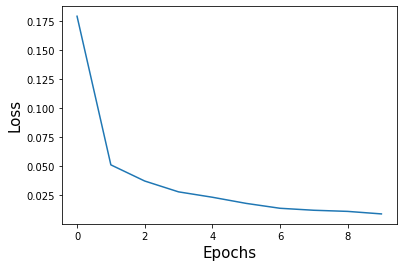

In [69]:
import matplotlib.pyplot as plt

plt.plot(range(num_epochs), loss_hist)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.show()

Давайте посчитаем accuracy:

In [70]:
def calaculate_accuracy(model, data_loader):
    correct, total = 0, 0 
    with torch.no_grad(): 
        for batch in data_loader: # get batch
            imgs, labels = batch # parse batch
            imgs, labels = imgs.to(device), labels.to(device)
            y_pred = model.forward(imgs) # get output
            _, predicted = torch.max(y_pred.data, 1) # get predicted class
            total += labels.size(0) # all examples
            correct += (predicted == labels).sum().item() # correct predictions 
    return correct / total 

In [71]:
acc_train = round(calaculate_accuracy(model, train_loader), 3)
print(f"Accuracy train = {acc_train}")
acc_test = round(calaculate_accuracy(model, test_loader), 3)
print(f"Accuracy test = {acc_test}")

Accuracy train = 0.998
Accuracy test = 0.991


Если мы сравним результат с моделью, для которой мы использовали только полносвязные слои, то можем увидеть, как выросла точность и уменьшилась ошибка на обучении (точность выросла на ~10%, ошибка уменьшилась с 0.4 до ~ 0.01)

**Задание 2!**  Дополните архитектуру нейросети. Вставьте еще один сверточный слой с количеством фильтров 32, далее макспулинг и функция активации ReLU (подсказка: размерности последующих слоев уменьшаться). В качестве ответа принимается значение **Accuracy test**.


In [ ]:
class CNN_model_big(nn.Module):

    def __init__(self):
        super(CNN_model_big, self).__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), # входной канал=1 (изображение ч.б), на выходе 32 фильтра, размер ядра свертки 3x3, паддинг 1
            nn.MaxPool2d(2), # size [32,14,14]
            nn.ReLU(),
            #вставьте еще один сверточный слой с количеством фильтров 32, далее макспулинг и функция активации ReLU (подсказка: размерности последующих слоев уменьшаться)
            nn.Conv2d(32, 32, 3, padding=1), # входной канал=1 (изображение ч.б), на выходе 32 фильтра, размер ядра свертки 3x3, паддинг 1
            nn.MaxPool2d(2), # size [32,14,14]
            nn.ReLU(),

            nn.Conv2d(32, 32, 3, padding=1), # in channel=32, out=32
            nn.MaxPool2d(2), # size [32,7,7]
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32*7*7, 100), # размерность на входе линейного слоя = количество_каналов*высота*ширина
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x): 
        x = self.conv_stack(x) 
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # change run time to gpu to fast training
torch.manual_seed(0)
np.random.seed(0)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
model = CNN_model_big().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
loss_hist = [] # for plotting
for epoch in range(num_epochs):
    hist_loss = 0
    for _, batch in enumerate(train_loader, 0): # get batch
        # обрабатываем batch 
        imgs, labels = batch
        imgs, labels = imgs.to(device), labels.to(device)
        # Зануляем градиенты
        optimizer.zero_grad() 
        # получаем выходы сети
        y_pred = model(imgs) 
        # вычисляем loss
        loss = criterion(y_pred, labels)
        # вычисляем градиенты
        loss.backward() 
        # выполняем один шаг оптимизатора (обновляем параметры сети)
        optimizer.step()
        hist_loss += loss.item()
    loss_hist.append(hist_loss / len(train_loader))
    print(f"Epoch={epoch} loss={loss_hist[epoch]:.4f}")

acc_train = round(calaculate_accuracy(model, train_loader), 3)
print(f"Accuracy train = {acc_train}")
acc_test = round(calaculate_accuracy(model, test_loader), 3)
print(f"Accuracy test = {acc_test}")

Можно попробовать загрузить свое изображение и проверить, насколько хорошо будет работать обученный классификатор на новых данных. Можете нарисовать в графическом редакторе изображение цифры (желательно, чтобы изображение было квадратным).

In [ ]:
from google.colab import files
uploaded = files.upload() #Загрузим файл с изображением

In [ ]:
from PIL import Image
from torchvision import transforms

img_upl = Image.open(list(uploaded.keys())[0]) #откроем изображение
transform = transforms.Compose([transforms.Resize((28, 28)), #конвертируем в размер 28 на 28 пикселей
                                transforms.ToTensor()])

tensor = transforms.functional.rgb_to_grayscale(transform(img_upl)) #переводим в ч.б. изображение
tensor = transforms.functional.invert(tensor)

pred = model(tensor.unsqueeze(0).to(device)).cpu().detach() #получим выход с сети на нашей картинке

plt.rcParams["figure.figsize"] = (4, 4)
plt.imshow(tensor.cpu().squeeze(),cmap='gray')
plt.axis('off')
plt.show()

digits = np.argmax(pred.numpy(), axis=1)
print(pred)
print('Предсказанный класс: ', digits)

# 5. Визуализация


Нам может быть интересно, на какую информацию обращает внимание модель в процессе работы, на какие визуальные шаблоны реагирует, насколько они интерпретируемы? 

Чтобы ответить на все эти вопросы, можно визуализировать карты активаций и веса фильтров свёртки.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/what_hidden_layers.png" width="1000">

## Визуализация весов 

Веса фильтров на первом слое легко визуализировать. И результат легко интерпретируется, так как у фильтров такое же количество каналов, как и у цветных изображений (3).

Ниже приведен пример того, как это можно сделать для обученной модели в Pytorch (Alexnet).

Чтобы понять, через какие свойства можно получить доступ к весам, выведем структуру модели

In [73]:
from torchvision import models
alexnet = models.alexnet(weights='AlexNet_Weights.DEFAULT') 
print(alexnet)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Видно, что первый слой это 0-й элемент контейнера features.
Веса хранятся в weight.data

In [74]:
weight_tensor = alexnet.features[0].weight.data # extract weights
print('Weights shape', weight_tensor.shape)

Weights shape torch.Size([64, 3, 11, 11])


Чтобы отобразить все веса на одном изображении воспользуемся вспомогательной функцией [make_grid](https://pytorch.org/vision/stable/utils.html#torchvision.utils.make_grid) из [torchvision.utils](https://pytorch.org/vision/stable/utils.html)

На вход метод получает batch изображений (B x C x H x W) в формате torch.tensor и визуализирует их в виде таблице. 

In [75]:
from torchvision import utils

img_grid = utils.make_grid((weight_tensor + 1) / 2, pad_value=1) # combine weights from all channel into table, note remapping to (0,1) range
print("Output is CxHxW image", img_grid.shape)

Output is CxHxW image torch.Size([3, 106, 106])


Ее часто используют, чтобы отображать изображения в tensorboard 

А чтобы отобразить получившуюся таблицу в блокноте средствами matplotlib, нам потребуется поменять порядок хранения данных, поместив каналы на первое место.

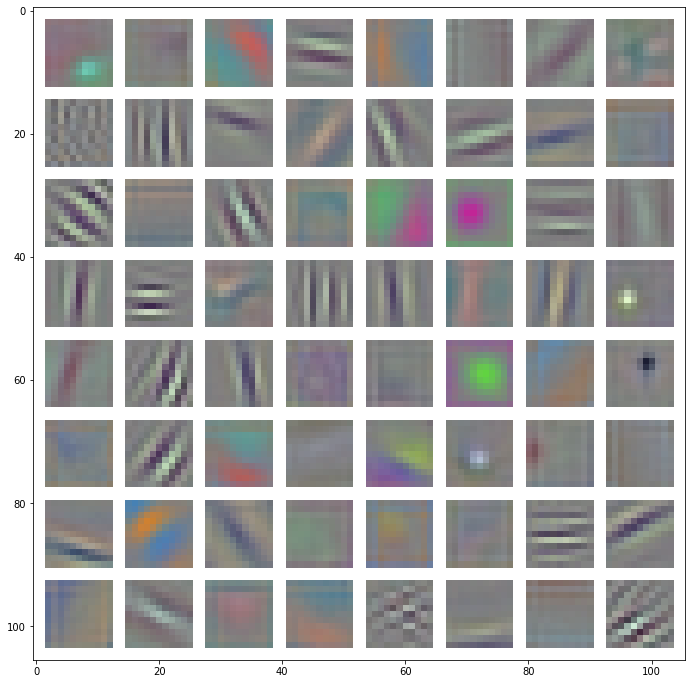

In [76]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (12,12)
plt.imshow(np.transpose(img_grid, (1, 2, 0))) # change channel order for compability with numpy & matplotlib
plt.show()

Видно, что модель научились улавливать простые геометрические формы - края под разными углами, точки того или иного цвета. Тем не менее, фильтры AlexNet'а оказались настолько большими, что частично захватили не только простую локальную информацию, но и сложные градиенты или решётки.


### Визуализация фильтров промежуточных слоев

К сожалению, выполнить ту же операцию для фильтров на скрытых слоях едва ли представляется разумным - в отличие от принятого трёхканального вида фильтров, который легко можно трактовать и визуализировать, фильтры поздних слоёв имеют гораздо больше каналов, что делает их удобное отображение практически невозможным. Пожалуй, единственным вариантом отображения является поканальное отображение весов, которое довольно сложно трактовать, в чём можно убедиться, взглянув на пример ниже.


**Higher Layer: Visualize Filter**
<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L06/weight_visualization.png" width="700">

<center><p><em>Source: <a href="https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html">ConvNetJS CIFAR-10 example</a></p> </em></center>

Визуализируем веса 2-го сверточного слоя AlexNet. 
Слой доступен через `features[3] `

In [87]:
weights_of_conv2_layer = alexnet.features[3].weight.data # extract weights
print(weights_of_conv2_layer.shape)

torch.Size([192, 64, 5, 5])


В нем 192 фильтра в каждом 64 ядра. Поэтому ограничимся первым фильтром и выведем все его ядра.

In [88]:
first_filter_kernels =  weights_of_conv2_layer[0]
print(first_filter_kernels.shape)

torch.Size([64, 5, 5])


Чтобы использовать image_grid входной тензор должен иметь формат BxCxHxW.  Поэтому добавим размерность соответствующую каналам:

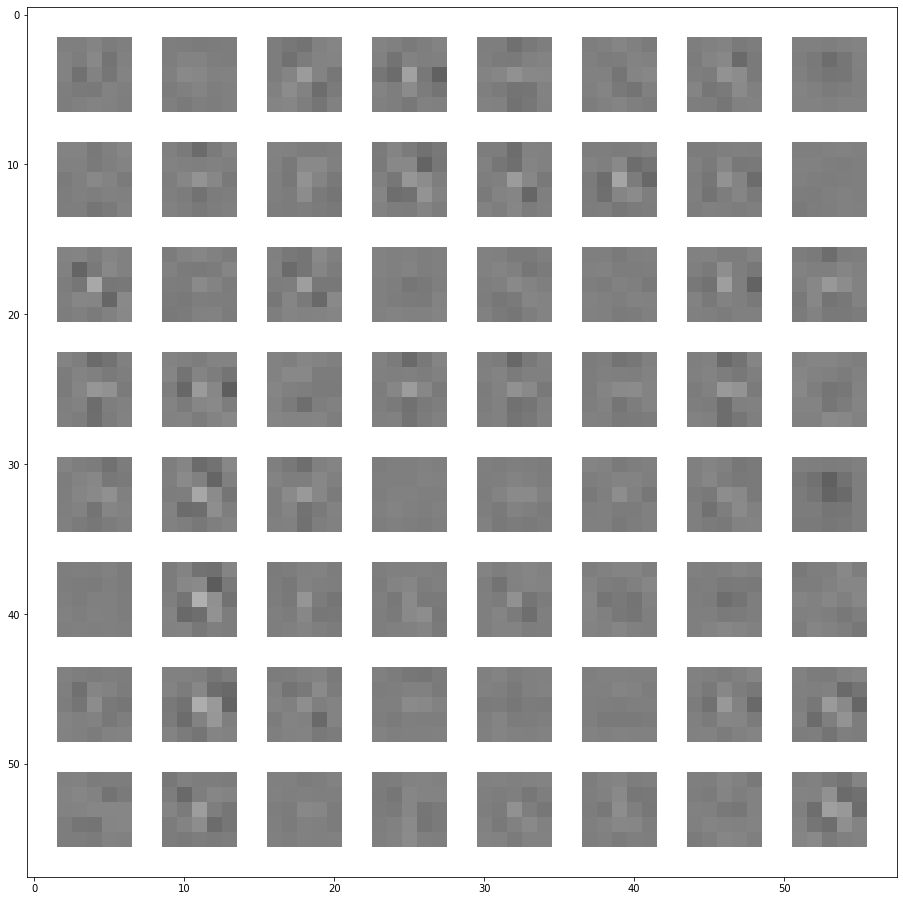

In [89]:
img_grid = utils.make_grid(
    weights_of_conv2_layer[0].unsqueeze(1), # add fake channel dim
    pad_value=1)

plt.rcParams["figure.figsize"] = (16, 16)
plt.imshow(np.transpose((img_grid + 1) / 2, (1, 2, 0))) # change channel order for compability with numpy
plt.show()

Интерпретация такой визуализации довольно затруднительна, зато мы разобрались, как получать доступ к весам.

## Визуализация карт активаций

Наиболее очевидный метод визуализации заключается в том, чтобы показать активации сети во время прямого прохода. Для сетей ReLU активации обычно начинают выглядеть относительно сгущенными и плотными, но по мере развития обучения активации обычно становятся более редкими и локализованными. 

На последних слоях свёрточной нейронной сети размеры рецептивных полей нейронов становятся сравнимы с размером исходного изображения, потому при визуализации их карт активации становится понятно, какие нейроны реагируют на какие части изображений.

К примеру, на изображении ниже активация выделенного нейрона достигнута благодаря пикселям, примерно соответствующим расположению лица человека, потому можно предположить, что он научился находить лица на изображении. Более подробно об этом можно почитать в статье [Understanding Neural Networks Through Deep Visualization](https://arxiv.org/abs/1506.06579).

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L06/visualization_activations.png" width="700">

В отличие от весов, карты активаций не сохраняются в памяти. Для того чтобы получить к ним доступ, в pytorch предусмотрен механизм под названием [Hooks](https://pytorch.org/tutorials/beginner/former_torchies/nnft_tutorial.html#forward-and-backward-function-hooks)

Благодаря ему можно получить доступ к выходам или входам слоя, как при прямом, так и при обратном распространении сигнала через сеть.



Зарегистрируем свой hook. Он просто выведет в консоль размеры карты активации (выхода слоя).



In [90]:
from torch import nn
def module_hook(module: nn.Module, input, output):  # For nn.Module objects only.
    print("Hi, i am hook_1!", output.shape) # activation_map

handle = alexnet.features[10].register_forward_hook(module_hook) # attach hook to last conv layer

Проверим, что он работает

torch.Size([256, 1, 13, 13])


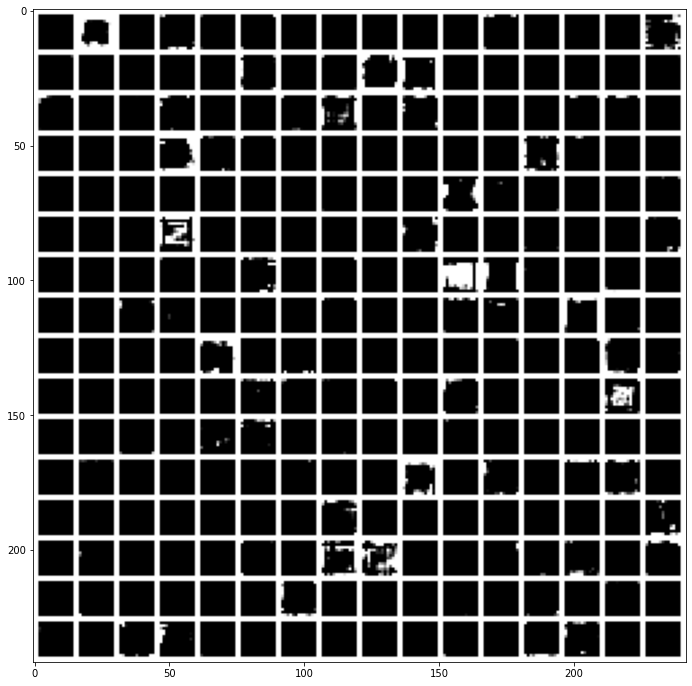

Hi, i am hook_1! torch.Size([1, 256, 13, 13])


In [91]:
import torch
out = alexnet(torch.randn(1, 3, 224, 224))

Чтобы удалить hook, используйте метод remove дескриптора, который возвращает метод register_forward_hook

torch.Size([256, 1, 13, 13])


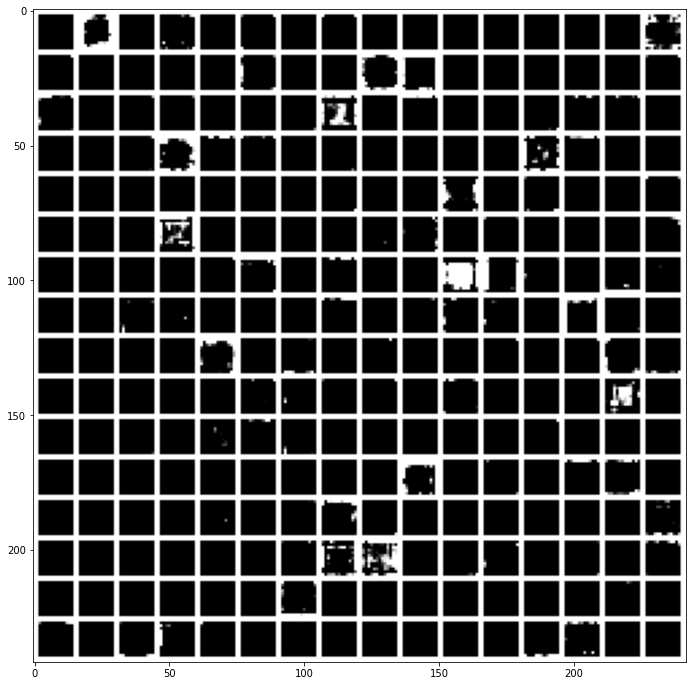

In [92]:
handle.remove()
out = alexnet(torch.randn(1, 3, 224, 224))

Вывода нет, hook отключился!

Теперь напишем hook, который выведет нам карту активации. 
Так как на выходе данного слоя 256 каналов, выведем каждый отдельно, подав на вход make_grid тензор с 256 элементами. 

Для этого потребуется:
* удалить batch измерение
* добавить измерение, имитирующее канал для картинок




In [93]:
def module_hook(module: nn.Module, input, output):
    #activation_map = output.squeeze(0).unsqueeze(1) # alternative solution
    activation_map = output.permute(1, 0, 2, 3)
    print(activation_map.shape)
    img_grid = utils.make_grid(activation_map,pad_value=10,nrow = 16) 
    plt.rcParams["figure.figsize"] = (12, 12)
    plt.imshow(np.transpose(img_grid, (1, 2, 0))) # change channel order for compability with numpy
    plt.show()

handle = alexnet.features[10].register_forward_hook(module_hook)



 

Чтобы карта активаций  была интерпретируема, надо использовать реальное изображение. Загрузим его:

In [94]:
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/L06/fox.jpg

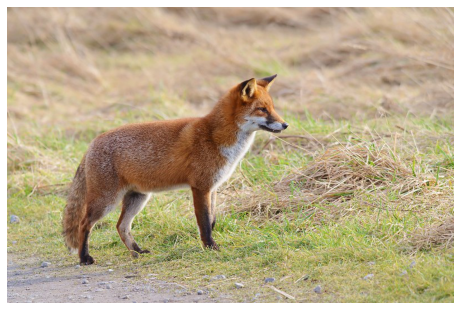

In [95]:
from PIL import Image
img_fox = Image.open("fox.jpg")

plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(img_fox)
plt.axis('off')
plt.show()

Загрузим изображение, преобразуем в тензор и подадим на вход модели:

torch.Size([256, 1, 15, 15])


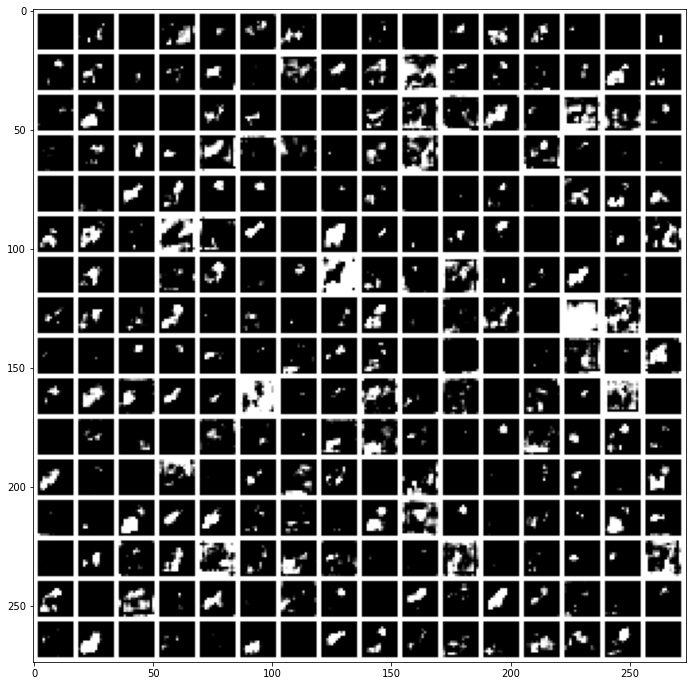

torch.Size([256, 1, 15, 15])


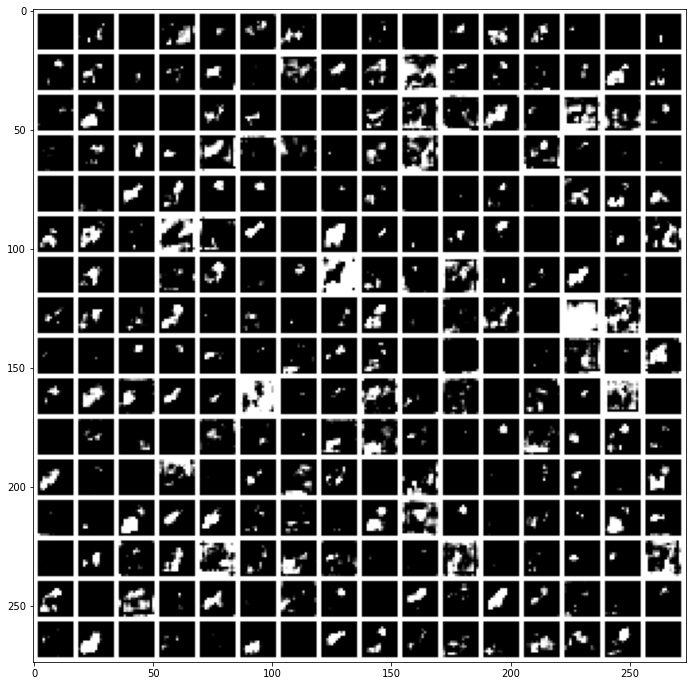

In [96]:
from torchvision import transforms

transform = transforms.Compose([transforms.Resize((256, 256)),
                                transforms.ToTensor()])

tensor = transform(img_fox)
out = alexnet(tensor.unsqueeze(0))

Тут уже можно увидеть некоторые паттерны. Видно, что многие фильтры реагируют на лисицу.

Единственная опасная ловушка, которую можно легко заметить с помощью этой визуализации, заключается в том, что некоторые карты активации могут быть равны нулю для многих различных входов. Это может указывать на мертвые фильтры и может быть симптомом высокой скорости обучения.